# <center> **Mental Health in Tech**

For this case study we will be utilizing data collected by Open Sourcing Mental Illness (OSMI) a profit organization dedicated to raising awareness providing 
education and offering resources to support mental well being, within the technology and open source communities. OSMI conducts surveys aimed at understanding 
perceptions of health in the technology workplace and examining the prevalence of mental health conditions among professionals in the tech industry. These surveys 
are open, for participation. Can be accessed on OSMIs website at https;//osmihelp.org/research."

## Introducing the case study

Conditions such as anxiety and depression can significantly impact an individual's well-being, lifestyle, and work productivity. According to Mental Health America, 
over 44 million adults in the US grapple with mental health issues. Particularly within the tech industry, where competitive environments often prevail, employee mental 
health stands as a paramount concern. In some cases, employees find themselves compelled to work extended hours merely to retain their positions. It's no surprise that company 
managers in such environments strive for enhanced mental well-being among their workforce, recognizing that a healthy mind breeds productivity, while a distracted one does not.

Leaders, whether in the tech sector or other industries, face challenging decisions regarding investment in employee mental health and the extent of such support. Numerous studies 
indicate the adverse impact of poor mental health on both well-being and productivity in the workplace. Each company operates within finite budgetary constraints, posing the question 
of where to allocate resources, a decision of utmost significance, particularly regarding mental health support.

This revised version maintains the core message while enhancing clarity and readability.

### The audience of the results of analytics

Understanding the audience for analytics outcomes is crucial. In this case, our primary audience comprises the managers and leaders within the tech industry—individuals 
who bear the responsibility of making decisions that directly impact the mental well-being of their employees.

Although mental health is a priority, the reality is that these decision-makers operate within a complex web of competing priorities such as organizational financial health, 
profitability, sales, customer service, and economic growth. Despite existing efforts, there remains a noticeable gap in mental health support within tech companies, as 
highlighted by a simple visualization provided by OSMI (accessible at https://osmi.typeform.com/report/A7mlxC/itVHRYbNRnPqDI9C).

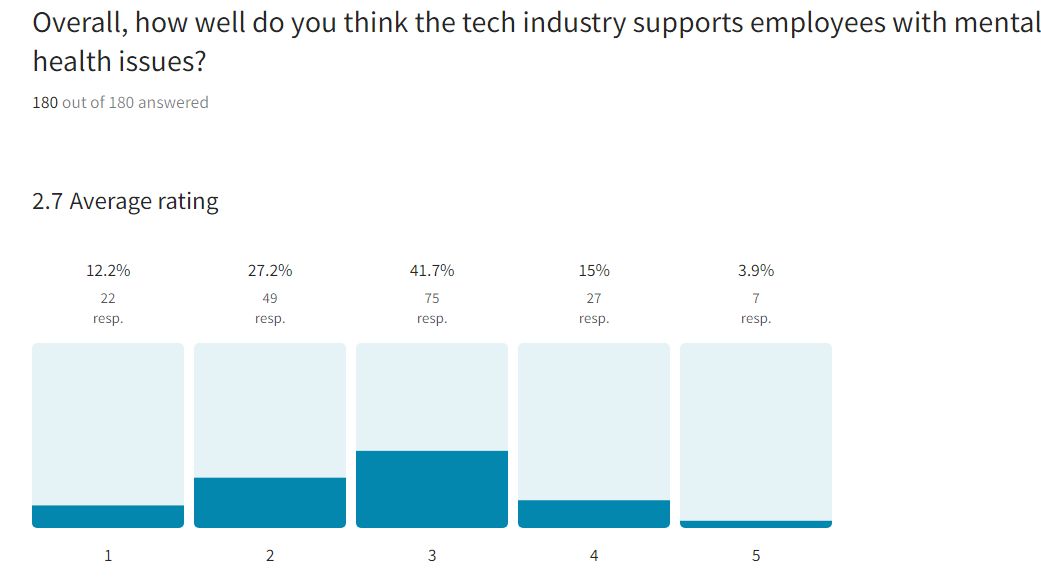

Our objective in this case study goes beyond the initial report by OSMI, aiming to explore various attributes' interactions. Through specific Analytic Questions (AQs), we aim 
to provide insights beneficial for the described decision-makers:

**AQ1:** *Does gender significantly impact the mental health of employees?*

**AQ2:** *Does age correlate with the mental health of employees?*

**AQ3:** *Is there a connection between a company's supportiveness and the mental health of its employees?*

**AQ4:** *How do individual attitudes towards mental health influence their mental well-being and their propensity to seek treatments?*

With a clear path ahead—defining the data analysis and the questions we aim to answer—we are now ready to delve into the data's sources and begin our exploration.

## **Data prepraration**

### Introduction to the source of the data

OSMI initiated the mental health in tech survey in 2014, and despite a decline in survey participation over subsequent years, they've continued to amass data. 
As of the development of this chapter, the raw data spanning 2014 and 2016 to 2020 is available for access at https://osmihelp.org/research.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the datasets
df_2016 = pd.read_csv('../datasets/2016.csv')
df_2017 = pd.read_csv('../datasets/2017.csv')
df_2018 = pd.read_csv('../datasets/2018.csv')
df_2019 = pd.read_csv('../datasets/2019.csv')
df_2020 = pd.read_csv('../datasets/2020.csv')

### Data Integration

In [3]:
from difflib import SequenceMatcher

def similar(a,b):
    return SequenceMatcher(None, a,b).ratio()

In [4]:
# testing the function
print(similar('apple', 'appel'))

0.8


In [5]:
print(df_2016.shape, '\n', df_2017.shape, '\n', df_2018.shape, '\n', df_2019.shape, '\n', df_2016.shape)

(1433, 63) 
 (756, 123) 
 (417, 123) 
 (352, 82) 
 (1433, 63)


### Data Cleaning Level I


In [6]:
# This chunk of code finds the common quesitons in the 4 data sources
Columns = pd.DataFrame(False, index=df_2017.columns, columns=['y2016','y2017','y2018','y2019','y2020'])
Columns.y2017 = True

for col in df_2016.columns:
    for inCol in Columns.index:
        if(similar(col, inCol)>0.7):
            Columns.at[inCol, 'y2016'] = True

for col in df_2018.columns:
    for inCol in Columns.index:
        if(similar(col, inCol)>0.7):
            Columns.at[inCol, 'y2018'] = True

for col in df_2019.columns:
    for inCol in Columns.index:
        if(similar(col, inCol)>0.7):
            Columns.at[inCol, 'y2019'] = True

for col in df_2020.columns:
    for inCol in Columns.index:
        if(similar(col, inCol)>0.7):
            Columns.at[inCol, 'y2020'] = True

Columns[Columns.y2016 & Columns.y2017 & Columns.y2018 & Columns.y2019&Columns.y2020]

,y2016,y2017,y2018,y2019,y2020
How many employees does your company or organization have?,True,True,True,True,True
Is your employer primarily a tech company/organization?,True,True,True,True,True
Is your primary role within your company related to tech/IT?,True,True,True,True,True
Does your employer provide mental health benefits as part of healthcare coverage?,True,True,True,True,True
Do you know the options for mental health care available under your employer-provided health coverage?,True,True,True,True,True
"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",True,True,True,True,True
Does your employer offer resources to learn more about mental health disorders and options for seeking help?,True,True,True,True,True
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,True,True,True,True,True
"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",True,True,True,True,True
Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,True,True,True,True,True


In [7]:
Selected_columns = ['Does your employer provide mental health benefits as part of healthcare coverage?',
                    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
                    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
                    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
                    'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
                    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
                    'Would you feel comfortable discussing a mental health issue with your coworkers?',
                    'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?',
                    'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?',
                    'How willing would you be to share with friends and family that you have a mental illness?',
                    'What is your age?',
                    'What is your gender?',
                    'What country do you <strong>live</strong> in?',
                    'What country do you <strong>work</strong> in?',
                    'Have you ever been diagnosed with a mental health disorder?',
                    'Have you ever sought treatment for a mental health disorder from a mental health professional?']

In [8]:
# if a column of 2016 data source is not one of the selected ones, this code drops it. 
droping_cols = []
for col in df_2016.columns:
    maxScore = 0
    for sel_col in Selected_columns:
        if(similar(col, sel_col)>maxScore):
            maxScore = similar(col, sel_col)
    if (maxScore < 0.7):
        droping_cols.append(col)
    else:
        if ('previous' in col):
            droping_cols.append(col)

df_2016.drop(columns= droping_cols, inplace=True)
df_2016.head()

,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,"If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,How willing would you be to share with friends and family that you have a mental illness?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?,What is your gender?,What country do you live in?,What country do you work in?
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Maybe,Yes,NaN,NaN,Some of my previous employers,Somewhat open,Yes,0,39,Male,United Kingdom,United Kingdom
1,No,Yes,Yes,Yes,Somewhat easy,Maybe,Yes,NaN,NaN,Some of my previous employers,Somewhat open,Yes,1,29,male,United States of America,United States of America
2,No,No,No,I don't know,Neither easy nor difficult,Maybe,Maybe,NaN,NaN,I don't know,Somewhat open,No,1,38,Male,United Kingdom,United Kingdom
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I'm not sure,I'm not sure,Some of my previous employers,Neutral,Yes,1,43,male,United Kingdom,United Kingdom
4,Yes,No,No,No,Neither easy nor difficult,Maybe,No,NaN,NaN,Some of my previous employers,Somewhat open,Yes,1,43,Female,United States of America,United States of America


In [9]:
# if a column of 2017 data source is not one of the selected ones, this code drops it. 
droping_cols = []
for col in df_2017.columns:
    maxScore = 0
    for sel_col in Selected_columns:
        if(similar(col,sel_col)>maxScore):
            maxScore = similar(col,sel_col)
    if (maxScore < 0.7):
        droping_cols.append(col)
    else:
        if('previous' in col):
            droping_cols.append(col)
    
        
df_2017.drop(columns = droping_cols, inplace=True)
df_2017.head(1)

,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,"If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",...,Have you ever been diagnosed with a mental health disorder?,Have you ever sought treatment for a mental health disorder from a mental health professional?,How willing would you be to share with friends and family that you have a mental illness?,What is your age?,What is your gender?,What country do you <strong>live</strong> in?,What US state or territory do you <strong>live</strong> in?,What is your race?,What country do you <strong>work</strong> in?,What US state or territory do you <strong>work</strong> in?
0,No,No,I don't know,I don't know,I don't know,Yes,Yes,1.0,NaN,NaN,...,NaN,1,5,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN


In [10]:
# if a column of 2018 data source is not one of the selected ones, this code drops it. 
droping_cols = []
for col in df_2018.columns:
    maxScore = 0
    for sel_col in Selected_columns:
        if(similar(col,sel_col)>maxScore):
            maxScore = similar(col,sel_col)
    if (maxScore <0.7):
        droping_cols.append(col)
    else:
        if('previous' in col):
            droping_cols.append(col)
    
        
df_2018.drop(columns = droping_cols, inplace=True)
df_2018.head(1)

,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,"If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",...,Have you ever been diagnosed with a mental health disorder?,Have you ever sought treatment for a mental health disorder from a mental health professional?,How willing would you be to share with friends and family that you have a mental illness?,What is your age?,What is your gender?,What country do you <strong>live</strong> in?,What US state or territory do you <strong>live</strong> in?,What is your race?,What country do you <strong>work</strong> in?,What US state or territory do you <strong>work</strong> in?
0,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,1.0,NaN,NaN,...,NaN,1,3,57,Female,Canada,NaN,NaN,Canada,NaN


In [11]:
# if a column of 2019 data source is not one of the selected ones, this code drops it. 
droping_cols = []
for col in df_2019.columns:
    maxScore = 0
    for sel_col in Selected_columns:
        if(similar(col,sel_col)>maxScore):
            maxScore = similar(col,sel_col)
    if (maxScore <0.7):
        droping_cols.append(col)
    else:
        if('previous' in col):
            droping_cols.append(col)
    
        
df_2019.drop(columns = droping_cols, inplace=True)
df_2019.head(1)

,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,"If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Would you have been willing to discuss your mental health with your direct supervisor(s)?,Have you ever been *diagnosed* with a mental health disorder?,Have you ever sought treatment for a mental health disorder from a mental health professional?,How willing would you be to share with friends and family that you have a mental illness?,What is your age?,What is your gender?,What country do you *live* in?,What is your race?,What country do you *work* in?
0,I don't know,Yes,Yes,I don't know,Very easy,Yes,Yes,True,NaN,NaN,Some of my previous supervisors,NaN,False,8,25,Male,United States of America,White,United States of America


In [12]:
# if a column of 2020 data source is not one of the selected ones, this code drops it. 
droping_cols = []
for col in df_2020.columns:
    maxScore = 0
    for sel_col in Selected_columns:
        if(similar(col,sel_col)>maxScore):
            maxScore = similar(col,sel_col)
    if (maxScore <0.7):
        droping_cols.append(col)
    else:
        if('previous' in col):
            droping_cols.append(col)
    
        
df_2020.drop(columns = droping_cols, inplace=True)
df_2020.head(1)

,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,"If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Would you have been willing to discuss your mental health with your direct supervisor(s)?,Have you ever been *diagnosed* with a mental health disorder?,Have you ever sought treatment for a mental health disorder from a mental health professional?,How willing would you be to share with friends and family that you have a mental illness?,What is your age?,What is your gender?,What country do you *live* in?,What is your race?,What country do you *work* in?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I'm not sure,"No, none of my previous supervisors",NaN,0,5,45,Male,United States of America,White,United States of America


In [13]:
Column_dict = {'SupportQ1': 'Does your employer provide mental health benefits as part of healthcare coverage?',
               'SupportQ2': 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
               'SupportQ3': 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
               'SupportQ4': 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
               'SupportQ5': 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
               'AttitudeQ1': 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
               'AttitudeQ2': 'Would you feel comfortable discussing a mental health issue with your coworkers?',
               'AttitudeQ3': 'How willing would you be to share with friends and family that you have a mental illness?',
               'SupportEx1': 'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?',
               'SupportEx2': 'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?',
               'Age': 'What is your age?',
               'Gender': 'What is your gender?',
               'ResidingCountry': 'What country do you <strong>live</strong> in?',
               'WorkingCountry': 'What country do you <strong>work</strong> in?',
               'MentalIlness': 'Have you ever been diagnosed with a mental health disorder?',
               'Treatment' : 'Have you ever sought treatment for a mental health disorder from a mental health professional?'}
Column_dict

{'SupportQ1': 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'SupportQ2': 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'SupportQ3': 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
 'SupportQ4': 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'SupportQ5': 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'AttitudeQ1': 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
 'AttitudeQ2': 'Would you feel comfortable discussing a mental health issue with your coworkers?',
 'AttitudeQ3': 'How willing would you be to share with friends and family that you have a mental illness

In [14]:
# Rename the columns - make the shorter
for col in df_2016:
    for key in Column_dict:
        if(similar(col,Column_dict[key])>0.9):
            df_2016.rename({col:key}, axis='columns', inplace=True)

df_2016.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",AttitudeQ2,AttitudeQ1,"If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,AttitudeQ3,Have you been diagnosed with a mental health condition by a medical professional?,Treatment,Age,Gender,What country do you live in?,What country do you work in?
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Maybe,Yes,NaN,NaN,Some of my previous employers,Somewhat open,Yes,0,39,Male,United Kingdom,United Kingdom


In [15]:
Others = {'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:':'SupportQ5',
         'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?':'SupportEx1',
          'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?':'SupportEx2',
         'Have you been diagnosed with a mental health condition by a medical professional?':'MentalIlness',
         'What country do you live in?':'ResidingCountry',
         'What country do you work in?':'WorkingCountry'}

df_2016.rename(Others, axis='columns', inplace=True)
df_2016.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ2,AttitudeQ1,SupportEx1,SupportEx2,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,AttitudeQ3,MentalIlness,Treatment,Age,Gender,ResidingCountry,WorkingCountry
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Maybe,Yes,NaN,NaN,Some of my previous employers,Somewhat open,Yes,0,39,Male,United Kingdom,United Kingdom


In [16]:
df_2016.drop(columns='Would you have been willing to discuss a mental health issue with your direct supervisor(s)?', inplace=True)

cols = ['SupportQ1', 'SupportQ2', 'SupportQ3', 'SupportQ4', 'SupportQ5',
       'AttitudeQ1', 'AttitudeQ2', 'AttitudeQ3', 'SupportEx1', 'SupportEx2',
       'Age', 'Gender', 'ResidingCountry', 'WorkingCountry', 'MentalIlness', 'Treatment']

df_2016 = df_2016[cols]
df_2016 = df_2016[list(df_2016.keys())]
df_2016.head()

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Yes,Maybe,Somewhat open,NaN,NaN,39,Male,United Kingdom,United Kingdom,Yes,0
1,No,Yes,Yes,Yes,Somewhat easy,Yes,Maybe,Somewhat open,NaN,NaN,29,male,United States of America,United States of America,Yes,1
2,No,No,No,I don't know,Neither easy nor difficult,Maybe,Maybe,Somewhat open,NaN,NaN,38,Male,United Kingdom,United Kingdom,No,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,I'm not sure,I'm not sure,43,male,United Kingdom,United Kingdom,Yes,1
4,Yes,No,No,No,Neither easy nor difficult,No,Maybe,Somewhat open,NaN,NaN,43,Female,United States of America,United States of America,Yes,1


In [17]:
# Rename the columns - make the shorter
for col in df_2017.columns:
    for key in Column_dict:
        if(similar(col,Column_dict[key])>0.95):
            df_2017.rename({col:key}, axis='columns', inplace=True)
df_2017.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,Have you ever discussed your mental health with coworkers?,SupportEx1,SupportEx2,...,MentalIlness,Treatment,AttitudeQ3,Age,Gender,ResidingCountry,What US state or territory do you <strong>live</strong> in?,What is your race?,WorkingCountry,What US state or territory do you <strong>work</strong> in?
0,No,No,I don't know,I don't know,I don't know,Yes,Yes,1.0,NaN,NaN,...,NaN,1,5,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN


In [18]:
df_2017.drop(columns=['Have you ever discussed your mental health with coworkers?',
                     'Would you have been willing to discuss your mental health with your direct supervisor(s)?',
                      'What US state or territory do you <strong>live</strong> in?',
                      'What is your race?',
                      'What US state or territory do you <strong>work</strong> in?'], inplace=True)

df_2017 = df_2017[cols]

df_2017 = df_2017[list(df_2017.keys())]
df_2017.head()

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,No,No,I don't know,I don't know,I don't know,Yes,Yes,5,NaN,NaN,27.0,Female,United Kingdom,United Kingdom,NaN,1
1,Yes,No,No,I don't know,I don't know,Maybe,Yes,4,NaN,NaN,31.0,male,United Kingdom,United Kingdom,NaN,0
2,I don't know,I don't know,No,Yes,Difficult,Yes,Maybe,5,NaN,NaN,36.0,male,United States of America,United States of America,Yes,1
3,Yes,I don't know,I don't know,Yes,Difficult,Yes,Yes,10,NaN,NaN,22.0,Male,United States of America,United States of America,Yes,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,No change,No change,52.0,female,United States of America,United States of America,NaN,1


In [19]:
# Rename the columns - make the shorter
for col in df_2018.columns:
    for key in Column_dict:
        if(similar(col, Column_dict[key])>0.95):
            df_2018.rename({col:key}, axis='columns', inplace=True)
                           
df_2018.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,Have you ever discussed your mental health with coworkers?,SupportEx1,SupportEx2,...,MentalIlness,Treatment,AttitudeQ3,Age,Gender,ResidingCountry,What US state or territory do you <strong>live</strong> in?,What is your race?,WorkingCountry,What US state or territory do you <strong>work</strong> in?
0,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,1.0,NaN,NaN,...,NaN,1,3,57,Female,Canada,NaN,NaN,Canada,NaN


In [20]:
df_2018.columns

Index(['SupportQ1', 'SupportQ2', 'SupportQ3', 'SupportQ4', 'SupportQ5',
       'AttitudeQ1', 'AttitudeQ2',
       'Have you ever discussed your mental health with coworkers?',
       'SupportEx1', 'SupportEx2',
       'Would you have been willing to discuss your mental health with your direct supervisor(s)?',
       'MentalIlness', 'Treatment', 'AttitudeQ3', 'Age', 'Gender',
       'ResidingCountry',
       'What US state or territory do you <strong>live</strong> in?',
       'What is your race?', 'WorkingCountry',
       'What US state or territory do you <strong>work</strong> in?'],
      dtype='object')

In [21]:
df_2018.drop(columns=['Have you ever discussed your mental health with coworkers?',  
                      'Would you have been willing to discuss your mental health with your direct supervisor(s)?',
                      'What US state or territory do you <strong>live</strong> in?',
                      'What is your race?',  
                      'What US state or territory do you <strong>work</strong> in?'], inplace=True)

df_2018 = df_2018[cols]
df_2018 = df_2018[list(df_2018.keys())]
df_2018.head()

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,3,NaN,NaN,57,Female,Canada,Canada,NaN,1
1,Yes,No,I don't know,I don't know,Somewhat difficult,No,No,3,NaN,NaN,29,male,United States of America,United States of America,Yes,1
2,Yes,No,No,I don't know,Somewhat easy,No,No,2,NaN,NaN,46,Male,United States of America,United States of America,NaN,0
3,No,No,No,I don't know,Neither easy nor difficult,No,Maybe,9,NaN,NaN,34,male,Norway,Norway,NaN,0
4,Yes,Yes,Yes,Yes,Somewhat easy,Yes,Yes,7,NaN,NaN,29,Ostensibly Male,United States of America,United States of America,Yes,1


In [22]:
# Rename the columns - make the shorter
for col in df_2019.columns:
    for key in Column_dict:
        if(similar(col,Column_dict[key])>0.95):
            df_2019.rename({col:key}, axis='columns', inplace=True)

df_2019.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,Have you ever discussed your mental health with coworkers?,SupportEx1,SupportEx2,Would you have been willing to discuss your mental health with your direct supervisor(s)?,MentalIlness,Treatment,AttitudeQ3,Age,Gender,What country do you *live* in?,What is your race?,What country do you *work* in?
0,I don't know,Yes,Yes,I don't know,Very easy,Yes,Yes,True,NaN,NaN,Some of my previous supervisors,NaN,False,8,25,Male,United States of America,White,United States of America


In [23]:
Others = {'What country do you *live* in?':'ResidingCountry',
         'What country do you *work* in?':'WorkingCountry'}

df_2019.rename(Others, axis='columns', inplace=True)
df_2019.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,Have you ever discussed your mental health with coworkers?,SupportEx1,SupportEx2,Would you have been willing to discuss your mental health with your direct supervisor(s)?,MentalIlness,Treatment,AttitudeQ3,Age,Gender,ResidingCountry,What is your race?,WorkingCountry
0,I don't know,Yes,Yes,I don't know,Very easy,Yes,Yes,True,NaN,NaN,Some of my previous supervisors,NaN,False,8,25,Male,United States of America,White,United States of America


In [24]:
df_2019.drop(columns=['Have you ever discussed your mental health with coworkers?',
                      'Would you have been willing to discuss your mental health with your direct supervisor(s)?',
                      'What is your race?'], inplace=True)

df_2019 = df_2019[cols]
df_2019 = df_2019[list(df_2019.keys())]
df_2019.head()

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,I don't know,Yes,Yes,I don't know,Very easy,Yes,Yes,8,NaN,NaN,25,Male,United States of America,United States of America,NaN,False
1,Yes,No,Yes,Yes,I don't know,Maybe,Maybe,7,NaN,NaN,51,male,United States of America,United States of America,NaN,False
2,I don't know,No,I don't know,I don't know,Somewhat difficult,No,Maybe,4,NaN,NaN,27,Male,United States of America,United States of America,NaN,False
3,I don't know,Yes,Yes,Yes,Very easy,Yes,Maybe,3,NaN,NaN,37,male,United States of America,United States of America,NaN,False
4,I don't know,I don't know,I don't know,I don't know,I don't know,No,No,1,NaN,NaN,46,m,United States of America,United States of America,NaN,False


In [25]:
# Rename the columns - make the shorter
for col in df_2020.columns:
    for key in Column_dict:
        if(similar(col,Column_dict[key])>0.95):
            df_2020.rename({col:key}, axis='columns', inplace=True)
df_2020.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,Have you ever discussed your mental health with coworkers?,SupportEx1,SupportEx2,Would you have been willing to discuss your mental health with your direct supervisor(s)?,MentalIlness,Treatment,AttitudeQ3,Age,Gender,What country do you *live* in?,What is your race?,What country do you *work* in?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I'm not sure,"No, none of my previous supervisors",NaN,0,5,45,Male,United States of America,White,United States of America


In [26]:
Others = {'What country do you *live* in?':'ResidingCountry',
         'What country do you *work* in?':'WorkingCountry'}
df_2020.rename(Others, axis='columns', inplace=True)
df_2020.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,Have you ever discussed your mental health with coworkers?,SupportEx1,SupportEx2,Would you have been willing to discuss your mental health with your direct supervisor(s)?,MentalIlness,Treatment,AttitudeQ3,Age,Gender,ResidingCountry,What is your race?,WorkingCountry
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I'm not sure,"No, none of my previous supervisors",NaN,0,5,45,Male,United States of America,White,United States of America


In [27]:
df_2020.drop(columns=[ 'Have you ever discussed your mental health with coworkers?',
                      'Would you have been willing to discuss your mental health with your direct supervisor(s)?',
                     'What is your race?'], inplace=True)

df_2020 = df_2020[cols]
df_2020 = pd.DataFrame(df_2020[list(Column_dict.keys())])
df_2020.head()

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,I'm not sure,45,Male,United States of America,United States of America,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,Positively,Positively,24,female,Russia,Russia,Yes,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Negatively,Negatively,46,Male,India,India,No,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Negatively,Negatively,25,Female,Canada,Canada,No,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Negatively,I'm not sure,25,F,Canada,Canada,NaN,0


In [28]:
# Add the column year to all datasource before combining them all
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019
df_2020['Year'] = 2020

Column_dict['Year'] = 'The year this data was collected.'

In [29]:
# Integrate all data
in_df = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020])
in_df.reset_index(inplace=True)
in_df.drop(columns=['index'], inplace=True)
in_df.head(5)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment,Year
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Yes,Maybe,Somewhat open,NaN,NaN,39.0,Male,United Kingdom,United Kingdom,Yes,0,2016
1,No,Yes,Yes,Yes,Somewhat easy,Yes,Maybe,Somewhat open,NaN,NaN,29.0,male,United States of America,United States of America,Yes,1,2016
2,No,No,No,I don't know,Neither easy nor difficult,Maybe,Maybe,Somewhat open,NaN,NaN,38.0,Male,United Kingdom,United Kingdom,No,1,2016
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,I'm not sure,I'm not sure,43.0,male,United Kingdom,United Kingdom,Yes,1,2016
4,Yes,No,No,No,Neither easy nor difficult,No,Maybe,Somewhat open,NaN,NaN,43.0,Female,United States of America,United States of America,Yes,1,2016


### Data Cleaning Level II

In [30]:
# checking the possible values of each columns to see if further clearning is needed.
for col in in_df.columns:
    print(col)
    print(in_df[col].unique())
    print('-----------------------------------------------------------')

SupportQ1
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"
 'Not eligible for coverage / NA']
-----------------------------------------------------------
SupportQ2
['No' 'Yes' nan "I don't know"]
-----------------------------------------------------------
SupportQ3
['No' 'Yes' nan "I don't know"]
-----------------------------------------------------------
SupportQ4
["I don't know" 'Yes' nan 'No']
-----------------------------------------------------------
SupportQ5
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know" 'Difficult']
-----------------------------------------------------------
AttitudeQ1
['Yes' 'Maybe' nan 'No']
-----------------------------------------------------------
AttitudeQ2
['Maybe' nan 'Yes' 'No']
-----------------------------------------------------------
AttitudeQ3
['Somewhat open' 'Neutral'
 'Not applicable to me (I do not have a mental illness)' 'Very open'
 'Not open at all' 'Somewh

#### Clean Gender

In [31]:
# strip the strings so the acidental spaces do not throw off our codes
in_df.Gender = in_df.Gender.str.strip()

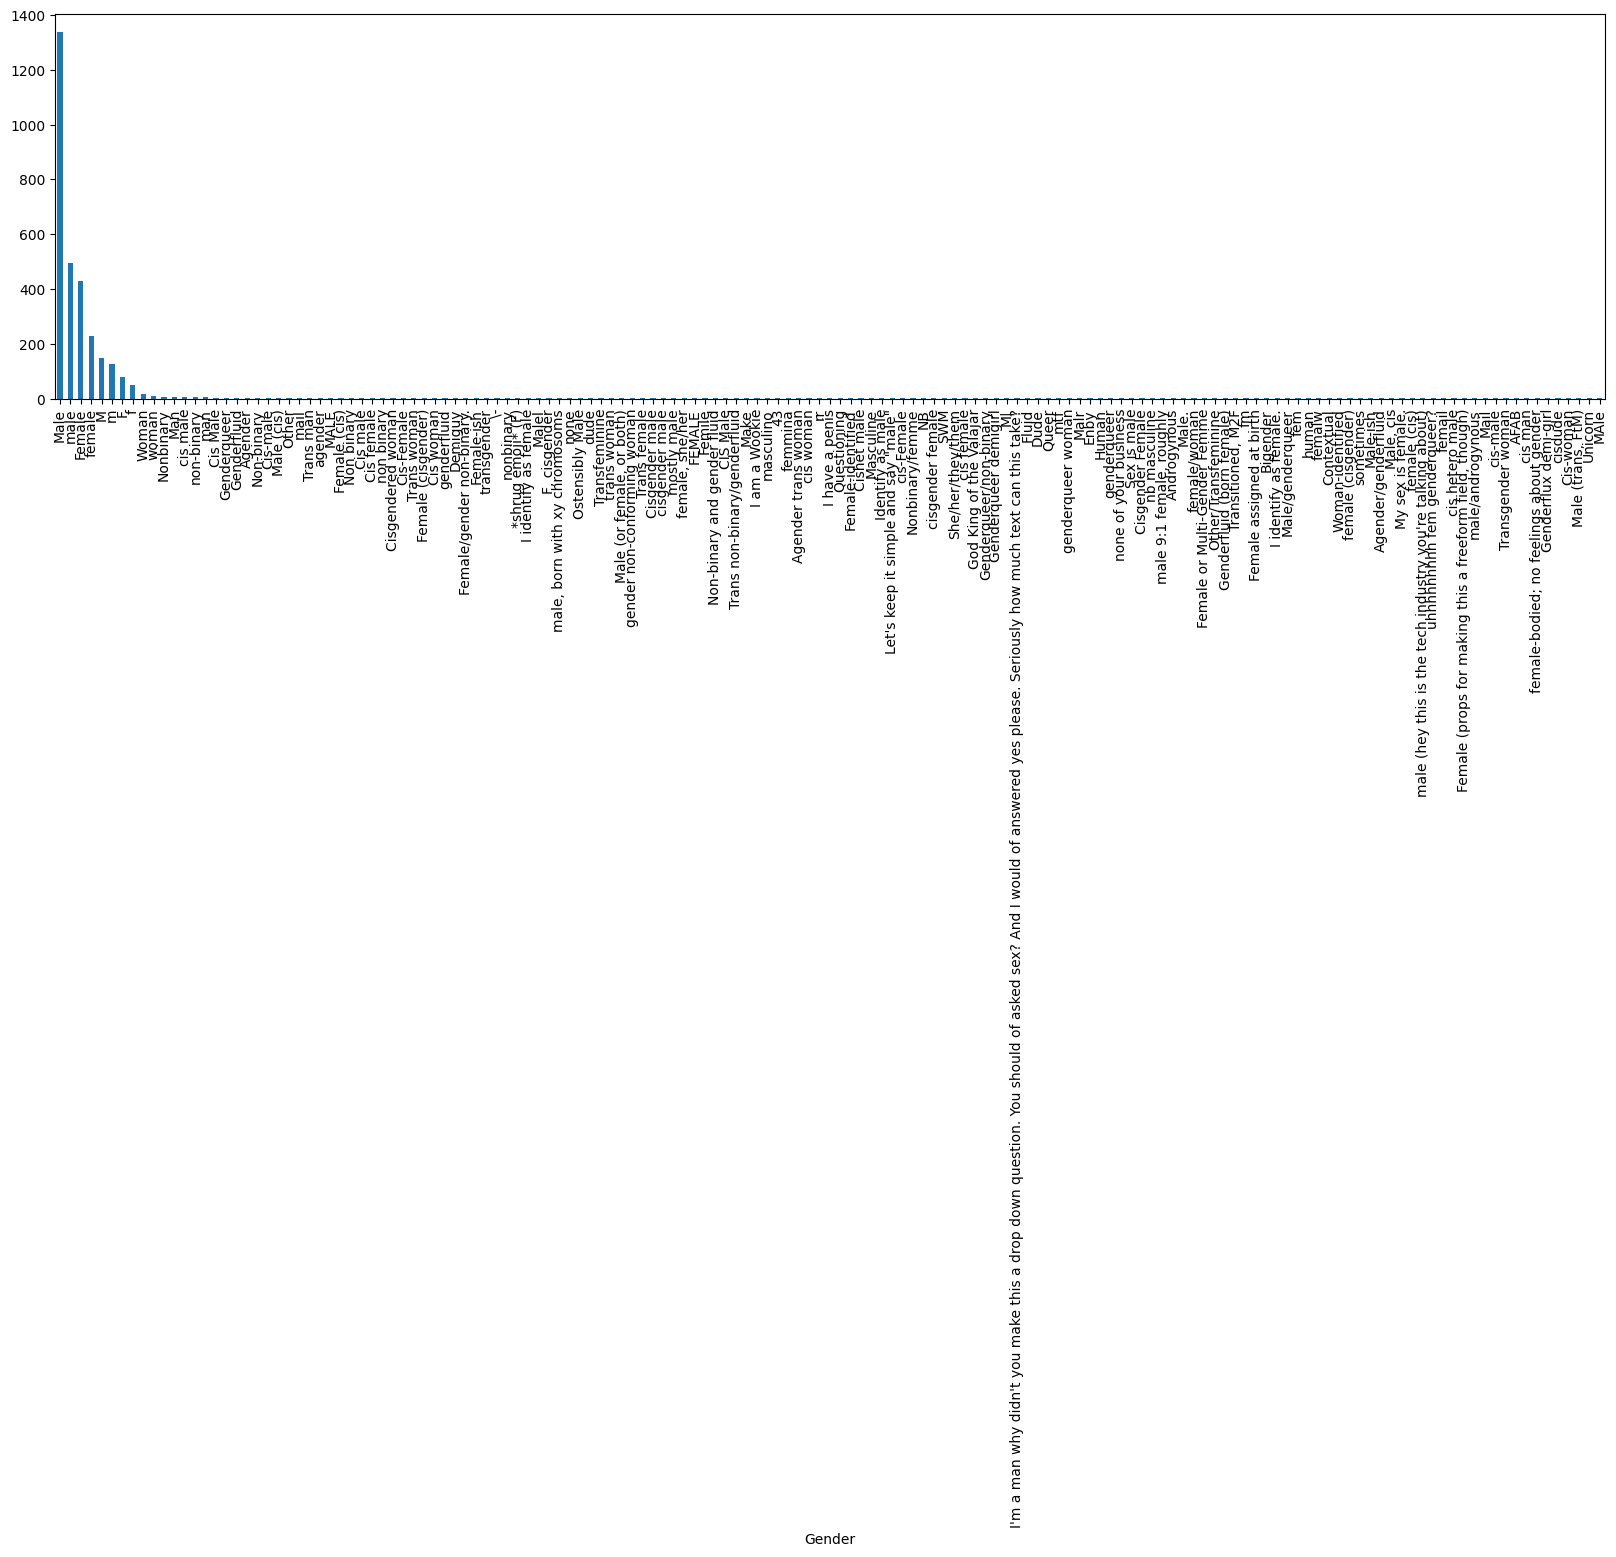

In [32]:
plt.figure(figsize=(20,5))
in_df.Gender.value_counts().plot(kind='bar', color='C0')
#plt.title('Gender')
plt.savefig('Gender.png', dpi=1000, bbox_inches='tight')

In [33]:
in_df.Gender.value_counts()

Gender
Male                 1338
male                  495
Female                428
female                229
M                     150
                     ... 
cisdude                 1
Cis-woman               1
Male (trans, FtM)       1
Unicorn                 1
MAle                    1
Name: count, Length: 149, dtype: int64

In [34]:
in_df.Gender.unique()

array(['Male', 'male', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'Bigender', 'non-binary',
       'Female assigned at birth', 'F', 'Woman', 'man', 'fm', 'f',
       'Cis female', 'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'woman',
       'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', nan, 'Male (cis)', 'Other',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'none of your business', 'genderqueer', 'cis male', 'Human',
       'Genderfluid', 'Enby', 'Malr', 'genderqueer woman', 'mtf', 'Queer',
       'Agender', 'Dude', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take?",
       'mail', 'M|', 'Male/genderqueer', 'fem', 'Nonbinary', 'human',
       'Female (props for making this a freeform field, though)',
       'Unic

In [35]:
rep_dic = {'male':'Male',
          'M':'Male',
          'm':'Male',
          'Man':'Male',
          'cis male':'Male',
          'Cis Male':'Male',
          'Cis-male':'Male',
          'CIS Male':'Male',
          'Male (cis)':'Male',
          'cis hetero male':'Male',
          'Mail':'Male',
          'mail':'Male',
          'Dude':'Male',
          'Male.':'Male',
          'Cis male':'Male',
          "Let's keep it simple and say 'male'":'Male',
          'cis-male':'Male',
          'dude':'Male',
          'cis man':'Male',
          'Make':'Male',
          'cisdude':'Male',
          'Cisgender male':'Male'}

in_df.Gender = in_df.Gender.replace(rep_dic)

In [36]:
in_df.Gender.value_counts()

Gender
Male                                                       2148
Female                                                      428
female                                                      229
F                                                            79
f                                                            49
                                                           ... 
Cis-woman                                                     1
Male (trans, FtM)                                             1
Unicorn                                                       1
Female (props for making this a freeform field, though)       1
MAle                                                          1
Name: count, Length: 128, dtype: int64

In [37]:
rep_dic = {'female':'Female',
          'f':'Female',
          'F':'Female',
          'Woman':'Female',
          'woman':'Female',
          'Female (cis)':'Female',
          'Cisgender Female':'Female',
          'female (cis)':'Female',
          'Cisgendered woman':'Female',
          'Cis-Female':'Female',
          'My sex is female.':'Female',
          'fm':'Female',
          'fem':'Female',
          'Female (cisgender)':'Female',
          'female (cisgender)':'Female',
          'Female (props for making this a freeform field, though)':'Female',
          'Cis woman':'Female',
          'female/woman':'Female',
          'F, cisgender':'Female',
          '*shrug emoji* (F)':'Female',
          'Cis-woman':'Female',
           'AFAB':'Female',
           'cis-Female':'Female',
           'cis female':'Female',
           'cisgender female':'Female',
           'cis woman':'Female'}

in_df.Gender = in_df.Gender.replace(rep_dic)

In [38]:
in_df.Gender.value_counts()

Gender
Male                    2148
Female                   832
Nonbinary                  8
non-binary                 5
man                        5
                        ... 
Genderflux demi-girl       1
Male (trans, FtM)          1
Unicorn                    1
human                      1
MAle                       1
Name: count, Length: 102, dtype: int64

In [39]:
def Replace_func(row):
    if (row.Gender != 'Male' and row.Gender != 'Female'):
        return 'Others'
    else:
        return row.Gender

In [40]:
in_df.Gender = in_df.apply(Replace_func, axis=1)

In [41]:
in_df.Gender.value_counts()

Gender
Male      2148
Female     832
Others     158
Name: count, dtype: int64

In [42]:
# Recheck to see what other columns need cleaning
for col in in_df.columns:
    print(col)
    print(in_df[col].unique())
    print('-------------------------------------')

SupportQ1
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"
 'Not eligible for coverage / NA']
-------------------------------------
SupportQ2
['No' 'Yes' nan "I don't know"]
-------------------------------------
SupportQ3
['No' 'Yes' nan "I don't know"]
-------------------------------------
SupportQ4
["I don't know" 'Yes' nan 'No']
-------------------------------------
SupportQ5
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know" 'Difficult']
-------------------------------------
AttitudeQ1
['Yes' 'Maybe' nan 'No']
-------------------------------------
AttitudeQ2
['Maybe' nan 'Yes' 'No']
-------------------------------------
AttitudeQ3
['Somewhat open' 'Neutral'
 'Not applicable to me (I do not have a mental illness)' 'Very open'
 'Not open at all' 'Somewhat not open' 5 4 10 8 3 6 2 9 7 1 0]
-------------------------------------
SupportEx1
[nan "I'm not sure" 'Yes' 'No' 'No change' 'Negatively' 'Positively'

In [43]:
## Clean AttitudeQ3
print(Column_dict['AttitudeQ3'])
in_df.AttitudeQ3.value_counts()

How willing would you be to share with friends and family that you have a mental illness?


AttitudeQ3
Somewhat open                                            640
10                                                       265
8                                                        264
7                                                        256
Very open                                                251
5                                                        219
Somewhat not open                                        214
6                                                        163
9                                                        162
Neutral                                                  141
Not applicable to me (I do not have a mental illness)    112
3                                                        108
4                                                         86
2                                                         79
Not open at all                                           75
0                                                         55
1            

In [44]:
replace_dic = {10:'Very open',
              9:'Very open',
              8:'Somewhat open',
              7:'Somewhat open',
              6:'Somewhat open',
              5:'Neutral',
              4:'Somewhat not open',
              3:'Somewhat not open',
              2:'Somewhat not open',
              1:'Not open at all',
              0:'Not open at all'}

in_df.AttitudeQ3 = in_df.AttitudeQ3.replace(replace_dic)

In [45]:
print(Column_dict['AttitudeQ3'])
in_df.AttitudeQ3.value_counts()

How willing would you be to share with friends and family that you have a mental illness?


AttitudeQ3
Somewhat open                                            1323
Very open                                                 678
Somewhat not open                                         487
Neutral                                                   360
Not open at all                                           178
Not applicable to me (I do not have a mental illness)     112
Name: count, dtype: int64

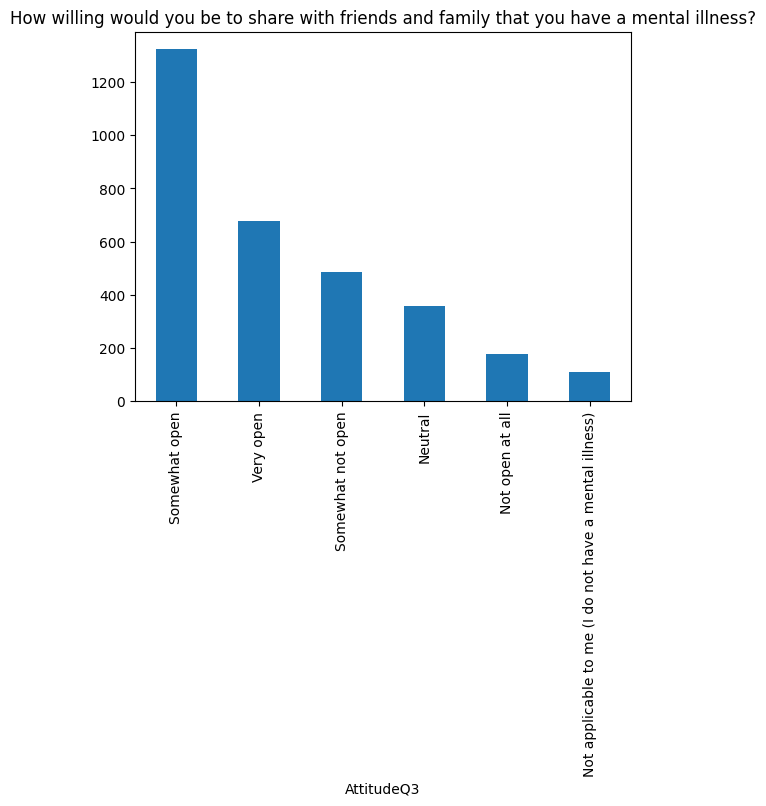

In [46]:
in_df.AttitudeQ3.value_counts().plot(kind='bar', color='C0')
plt.title(Column_dict['AttitudeQ3'])
plt.show()

In [47]:
# Recheck to see what other columns need cleaning
for col in in_df.columns:
    print(col)
    print(in_df[col].unique())
    print('-------------------------------------------')

SupportQ1
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"
 'Not eligible for coverage / NA']
-------------------------------------------
SupportQ2
['No' 'Yes' nan "I don't know"]
-------------------------------------------
SupportQ3
['No' 'Yes' nan "I don't know"]
-------------------------------------------
SupportQ4
["I don't know" 'Yes' nan 'No']
-------------------------------------------
SupportQ5
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know" 'Difficult']
-------------------------------------------
AttitudeQ1
['Yes' 'Maybe' nan 'No']
-------------------------------------------
AttitudeQ2
['Maybe' nan 'Yes' 'No']
-------------------------------------------
AttitudeQ3
['Somewhat open' 'Neutral'
 'Not applicable to me (I do not have a mental illness)' 'Very open'
 'Not open at all' 'Somewhat not open']
-------------------------------------------
SupportEx1
[nan "I'm not sure" 'Yes' 'No' 'No change' 

#### Clean SupportQ1

In [48]:
print(Column_dict['SupportQ1'])
in_df.SupportQ1.value_counts()

Does your employer provide mental health benefits as part of healthcare coverage?


SupportQ1
Yes                                1331
I don't know                        708
No                                  416
Not eligible for coverage / N/A      83
Not eligible for coverage / NA       71
Name: count, dtype: int64

In [49]:
replace_dic = {'Not eligible for coverage / N/A':'Not eligible',
              'Not eligible for coverage / NA':'Not eligible'}

in_df.SupportQ1 = in_df.SupportQ1.replace(replace_dic)

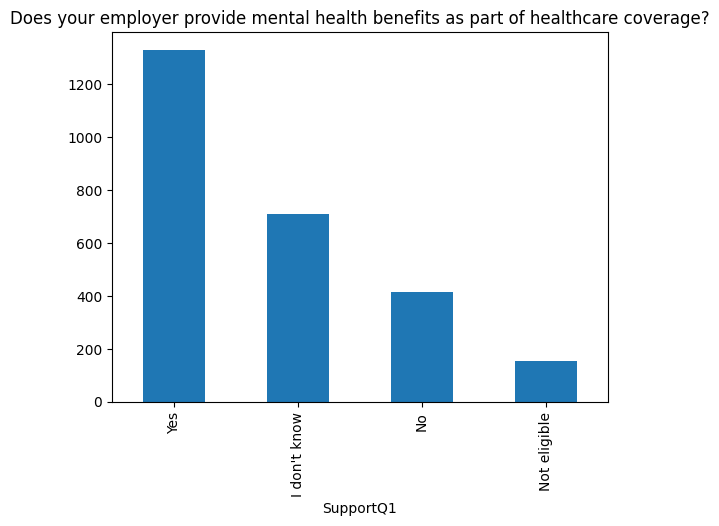

In [50]:
in_df.SupportQ1.value_counts().plot(kind='bar', color='C0')
plt.title(Column_dict['SupportQ1'])
plt.show()

#### Clean SupportEx1 and SupportEx2

In [51]:
print(Column_dict['SupportEx1'])
print(in_df.SupportEx1.value_counts())
print('----------------------------------')
print(Column_dict['SupportEx2'])
in_df.SupportEx2.value_counts()

If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?
SupportEx1
I'm not sure    105
No               42
Yes              36
Negatively       29
No change        23
Positively       16
Name: count, dtype: int64
----------------------------------
If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?


SupportEx2
Not applicable to me    246
I'm not sure            111
No                       57
Yes                      35
Positively               30
No change                28
Negatively               22
Name: count, dtype: int64

In [52]:
replace_dic = {'Yes':'Negatively',
              'No':"I'm not sure"}

in_df.SupportEx1 = in_df.SupportEx1.replace(replace_dic)
in_df.SupportEx2 = in_df.SupportEx2.replace(replace_dic)

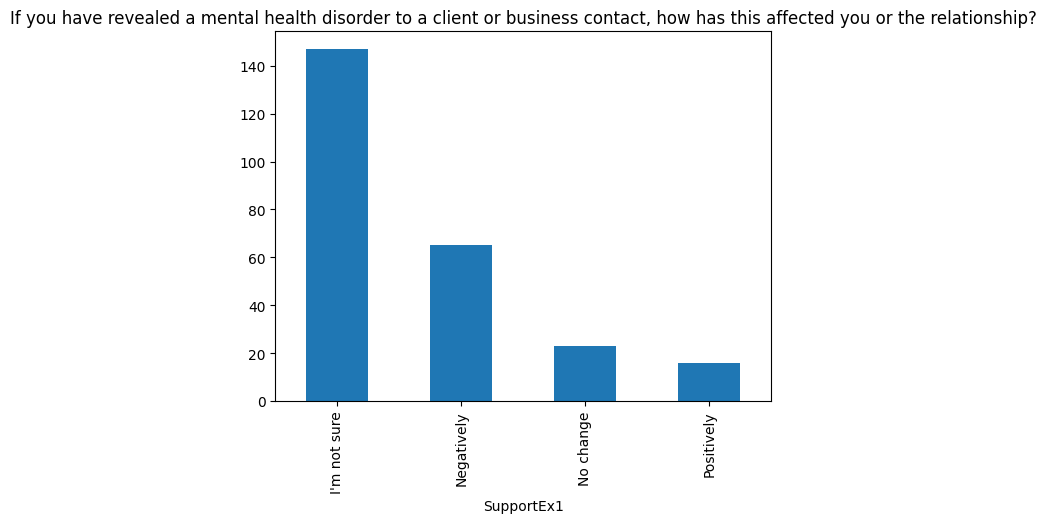

In [53]:
in_df.SupportEx1.value_counts().plot(kind='bar', color='C0')
plt.title(Column_dict['SupportEx1'])
plt.show()

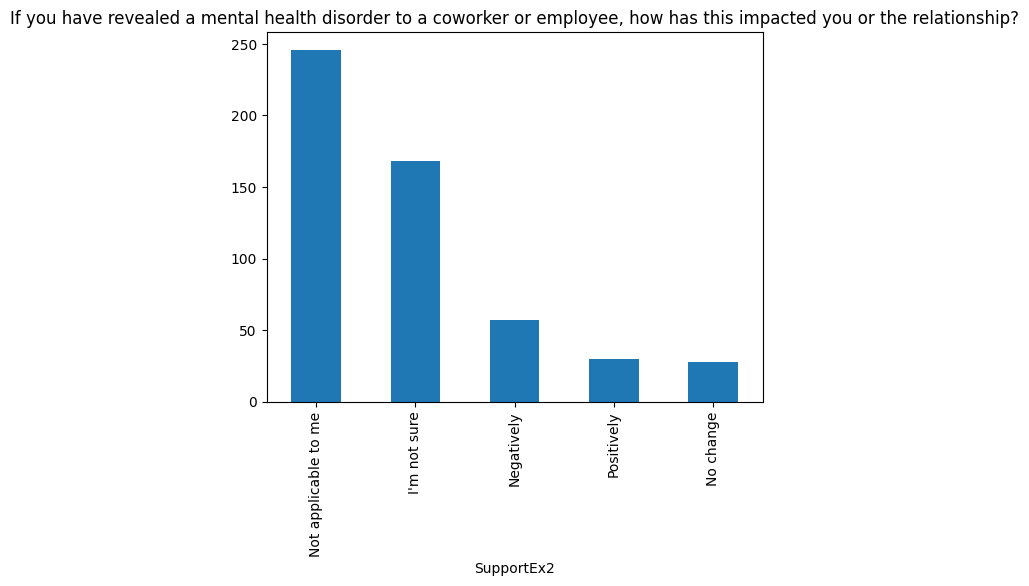

In [54]:
in_df.SupportEx2.value_counts().plot(kind='bar', color='C0')
plt.title(Column_dict['SupportEx2'])
plt.show()

#### Clean Treatment

In [55]:
print(Column_dict['Treatment'])
in_df.Treatment.value_counts()

Have you ever sought treatment for a mental health disorder from a mental health professional?


Treatment
1    1857
0    1281
Name: count, dtype: int64

In [56]:
replace_dic = {0: 'No',
              1: 'Yes'}

in_df.Treatment = in_df.Treatment.replace(replace_dic)

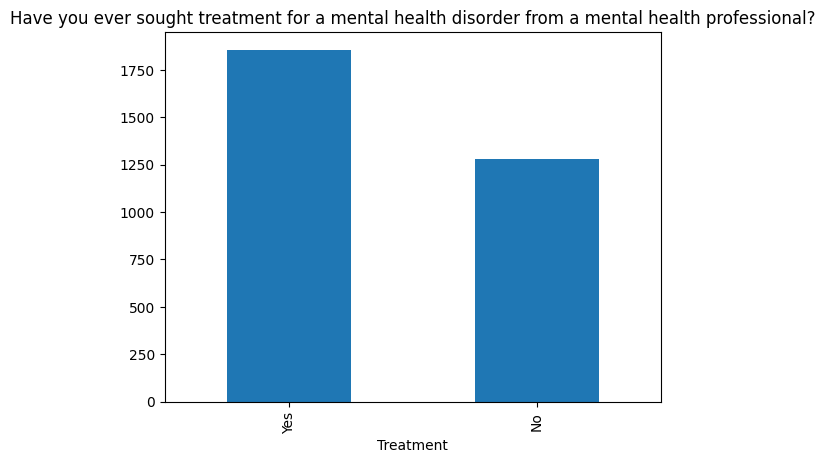

In [57]:
in_df.Treatment.value_counts().plot(kind='bar', color='C0').containers[0]
plt.title(Column_dict['Treatment'])
plt.show()

In [58]:
# reset the index due to removal of some of the rows
in_df.reset_index(inplace=True)
in_df.drop(columns=['index'], inplace=True)

In [59]:
in_df

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment,Year
0,Not eligible,No,No,I don't know,Very easy,Yes,Maybe,Somewhat open,NaN,NaN,39.0,Male,United Kingdom,United Kingdom,Yes,No,2016
1,No,Yes,Yes,Yes,Somewhat easy,Yes,Maybe,Somewhat open,NaN,NaN,29.0,Male,United States of America,United States of America,Yes,Yes,2016
2,No,No,No,I don't know,Neither easy nor difficult,Maybe,Maybe,Somewhat open,NaN,NaN,38.0,Male,United Kingdom,United Kingdom,No,Yes,2016
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,I'm not sure,I'm not sure,43.0,Male,United Kingdom,United Kingdom,Yes,Yes,2016
4,Yes,No,No,No,Neither easy nor difficult,No,Maybe,Somewhat open,NaN,NaN,43.0,Female,United States of America,United States of America,Yes,Yes,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,No,No,No,No,Somewhat difficult,No,No,Very open,NaN,NaN,53.0,Male,United States of America,United States of America,NaN,No,2020
3134,Yes,Yes,Yes,I don't know,Very easy,Maybe,Maybe,Somewhat not open,NaN,NaN,23.0,Female,Philippines,Philippines,NaN,No,2020
3135,I don't know,No,I don't know,I don't know,Somewhat easy,Maybe,Maybe,Somewhat open,NaN,NaN,34.0,Male,United States of America,United States of America,Yes,Yes,2020
3136,Yes,Yes,Yes,Yes,Difficult,No,Maybe,Neutral,NaN,NaN,43.0,Male,Canada,Canada,NaN,Yes,2020


### Data cleaning level III

#### Detecting and dealing with outliers and errors

In [60]:
for col in in_df.columns:
    print(col)
    print(in_df[col].value_counts())
    print('--------------------------------')

SupportQ1
SupportQ1
Yes             1331
I don't know     708
No               416
Not eligible     154
Name: count, dtype: int64
--------------------------------
SupportQ2
SupportQ2
No              1702
Yes              665
I don't know     242
Name: count, dtype: int64
--------------------------------
SupportQ3
SupportQ3
No              1153
Yes              757
I don't know     699
Name: count, dtype: int64
--------------------------------
SupportQ4
SupportQ4
I don't know    1633
Yes              813
No               163
Name: count, dtype: int64
--------------------------------
SupportQ5
SupportQ5
Somewhat easy                 681
Very easy                     536
I don't know                  399
Somewhat difficult            378
Neither easy nor difficult    362
Difficult                     135
Very difficult                118
Name: count, dtype: int64
--------------------------------
AttitudeQ1
AttitudeQ1
Yes      973
Maybe    865
No       771
Name: count, dtype: int64
-------

In [61]:
cat_attribues = ['SupportQ1', 'SupportQ2', 'SupportQ3', 'SupportQ4', 'SupportQ5',
       'AttitudeQ1', 'AttitudeQ2', 'AttitudeQ3', 'SupportEx1', 'SupportEx2',
       'Age', 'Gender', 'ResidingCountry', 'WorkingCountry', 'MentalIlness',
       'Treatment', 'Year']

num_attribues = ['Age']

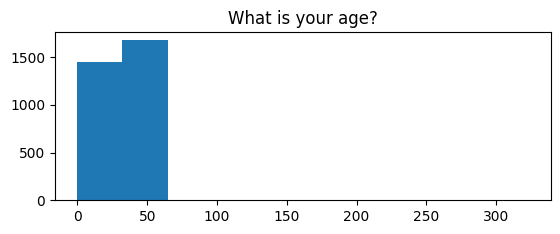

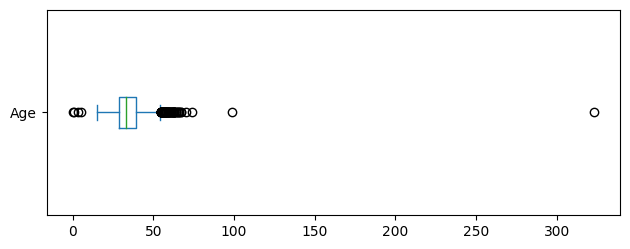

In [62]:
# First Numerical Attributes
plt.subplot(2,1,1)
plt.hist(in_df.Age)
plt.title(Column_dict['Age'])
plt.show()

plt.subplot(2,1,2)
in_df.Age.plot(kind='box', vert=False)
plt.tight_layout()
plt.show()



In [63]:
BM = (in_df.Age > 95) | (in_df.Age < 18)
ageMistake_indices = in_df[BM].index

for idx in ageMistake_indices:
    in_df.at[idx, 'Age'] = np.nan



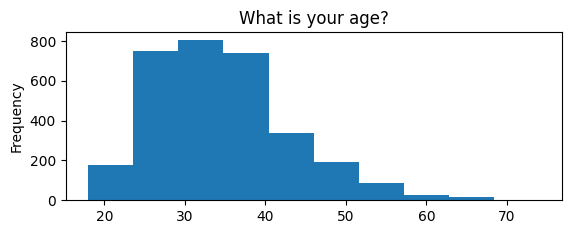

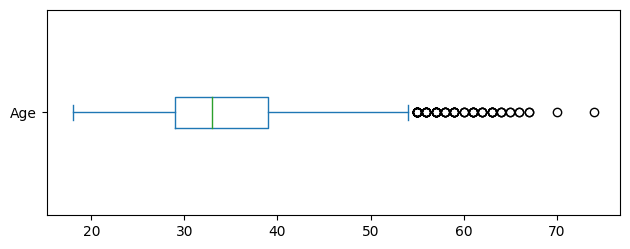

In [64]:
# First Numerical Attributes
plt.subplot(2,1,1)
in_df.Age.plot(kind='hist')
plt.title(Column_dict['Age'])
plt.show()

plt.subplot(2,1,2)
in_df.Age.plot.box(vert=False)
plt.tight_layout()
plt.show()

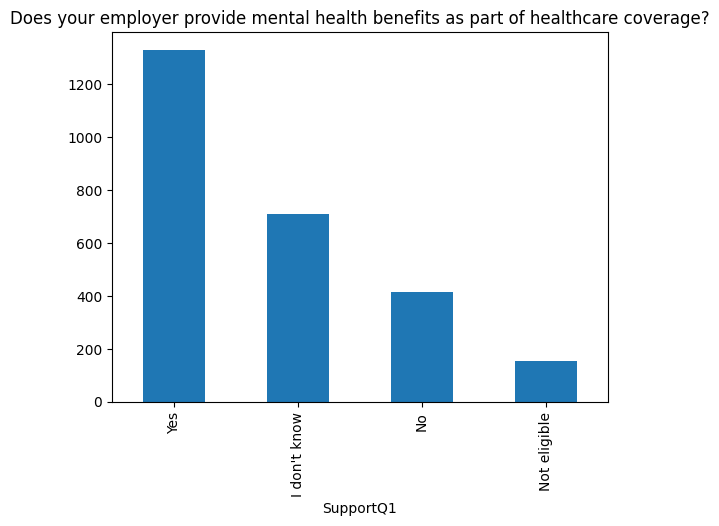

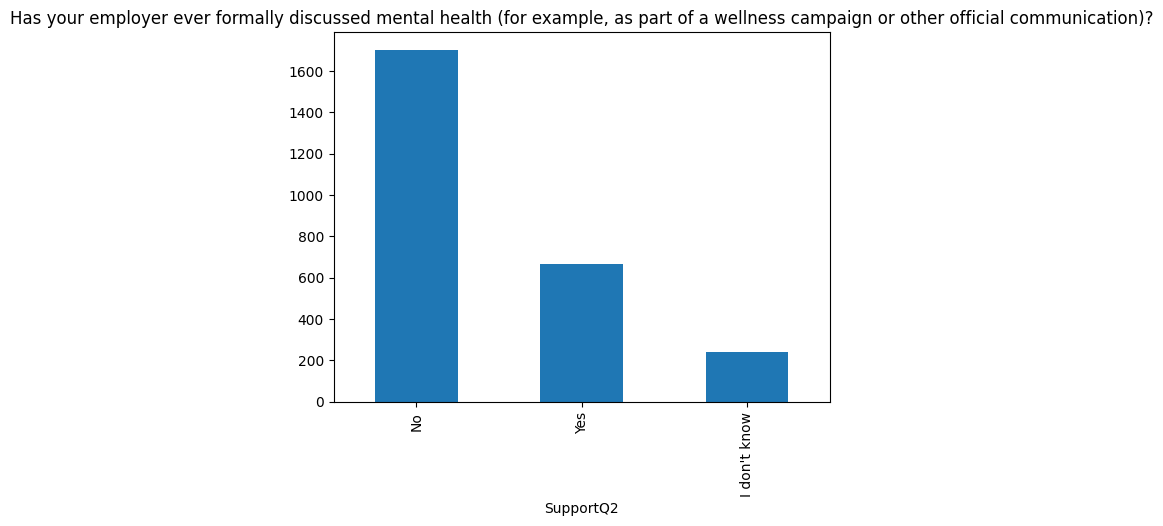

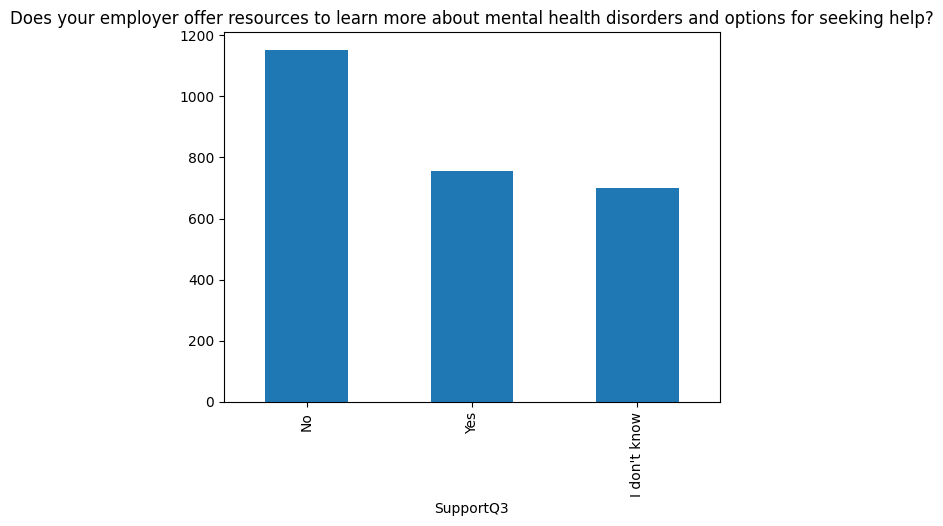

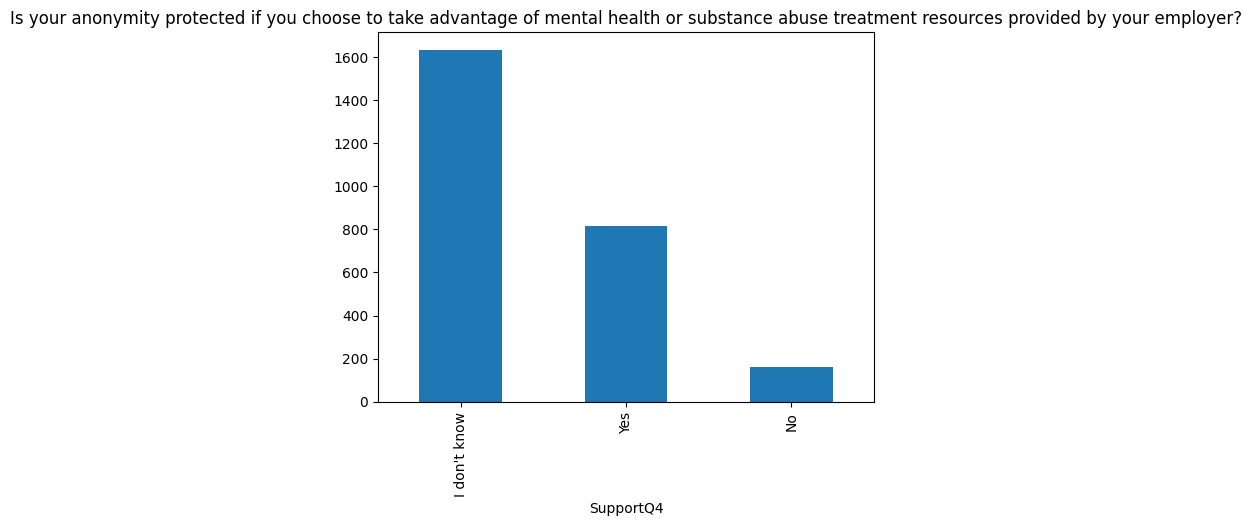

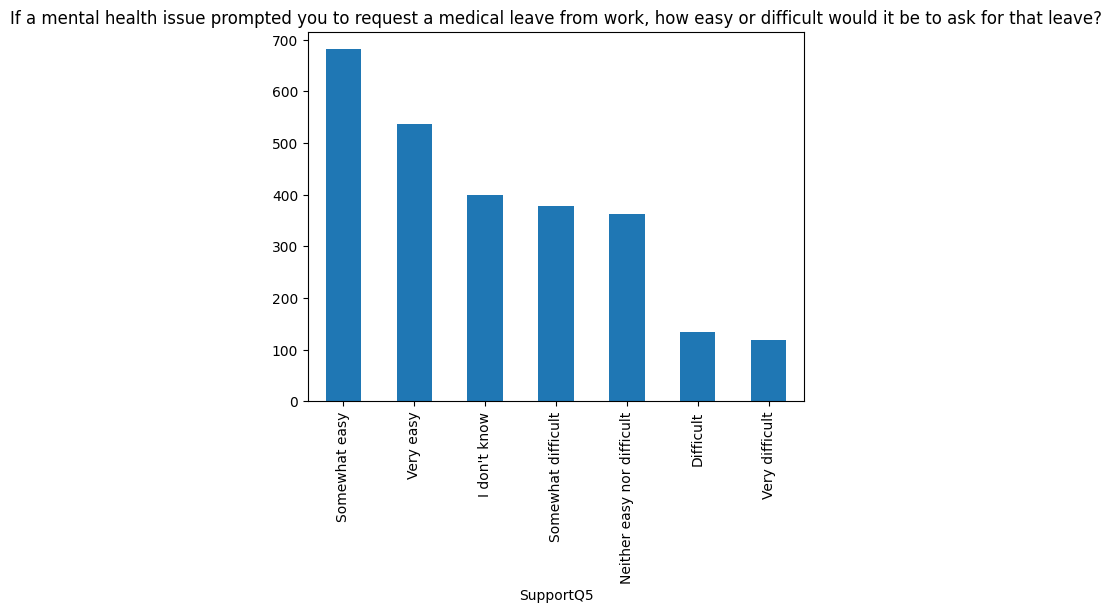

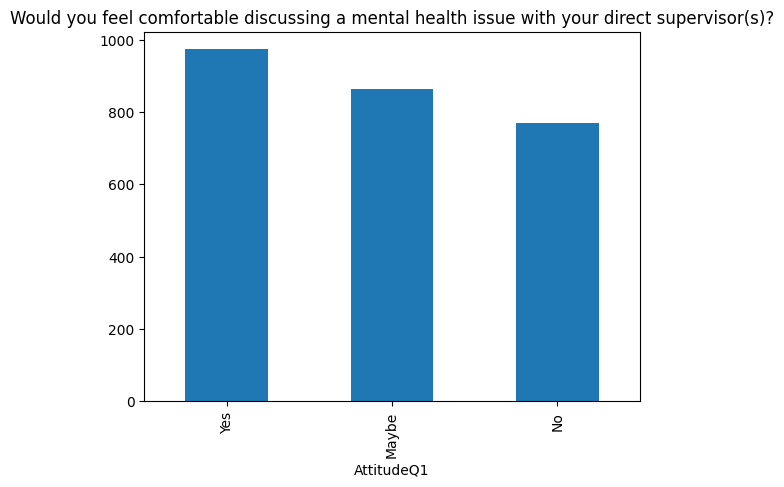

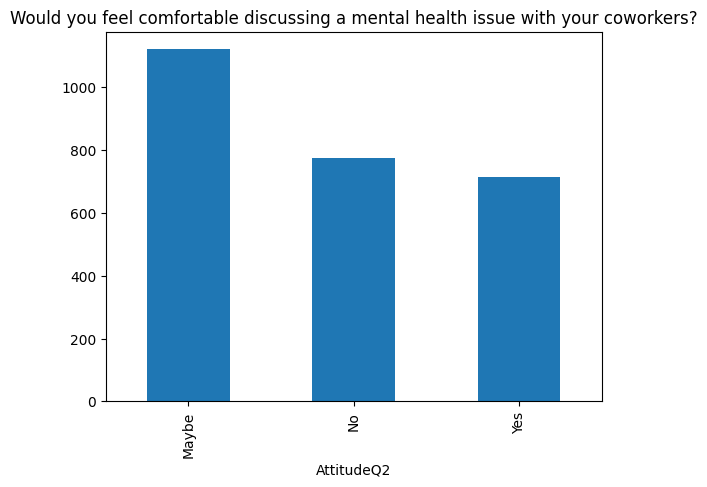

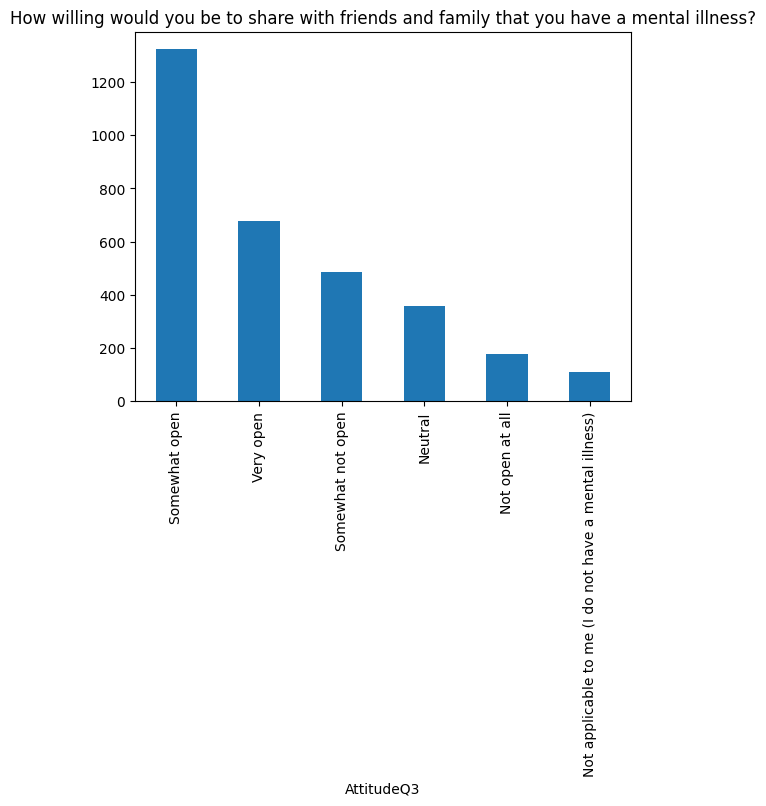

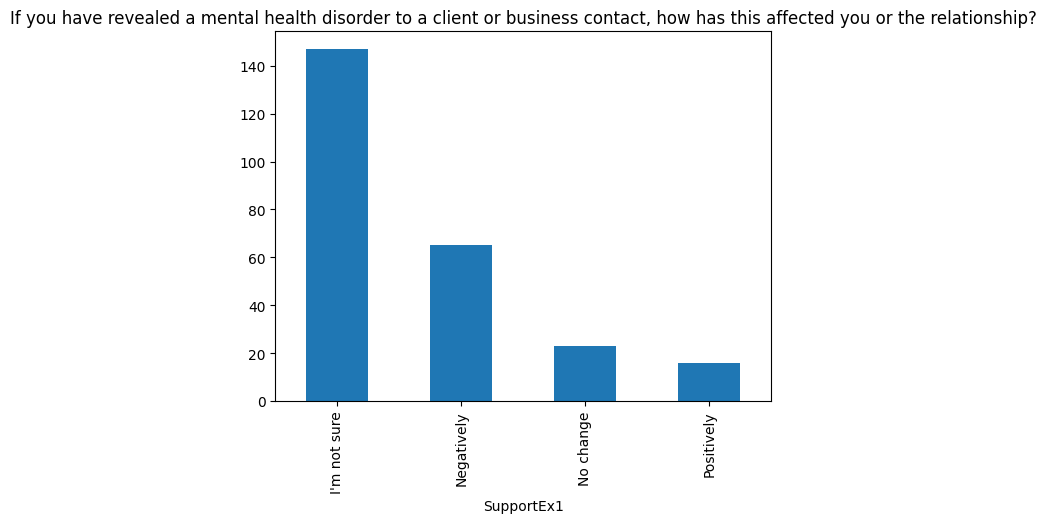

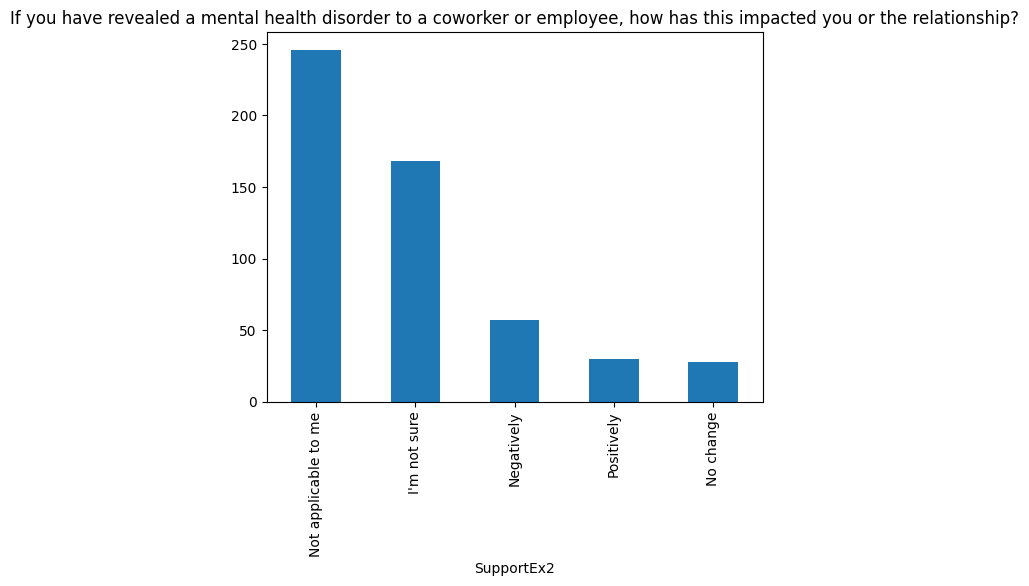

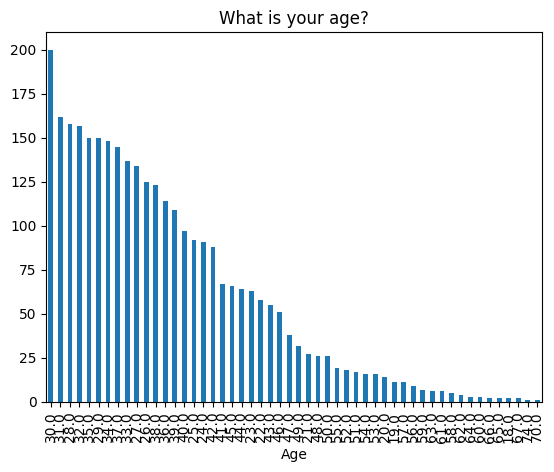

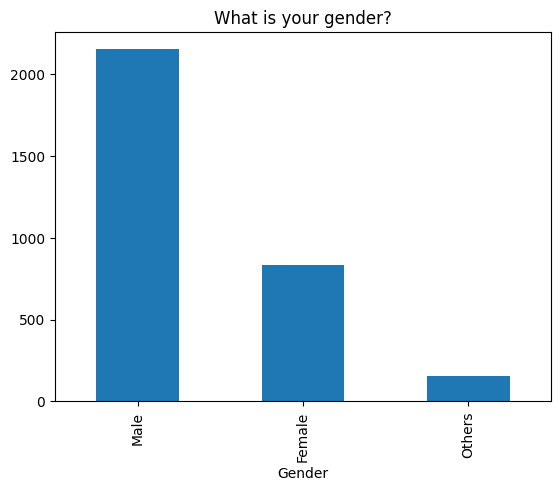

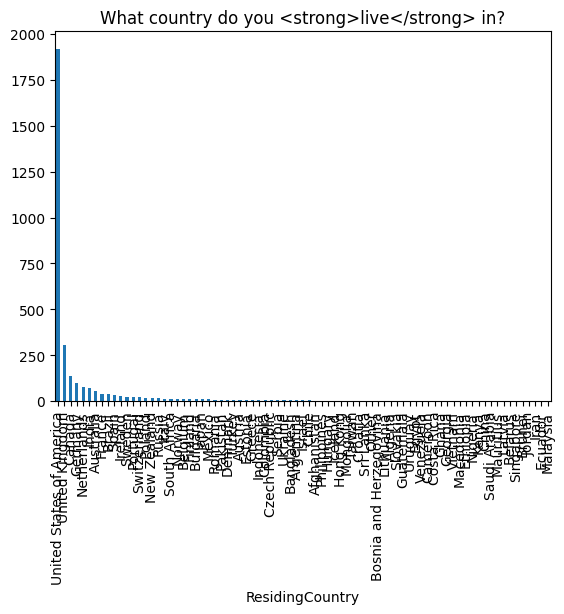

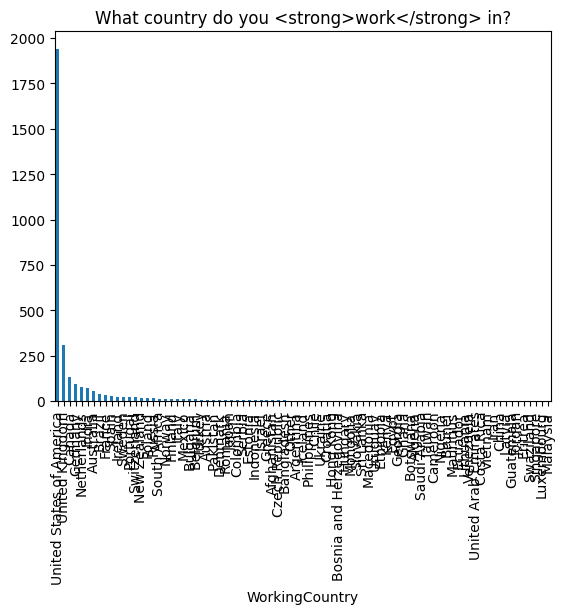

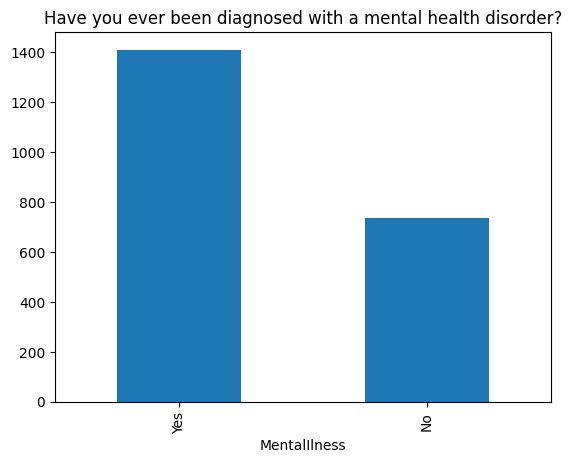

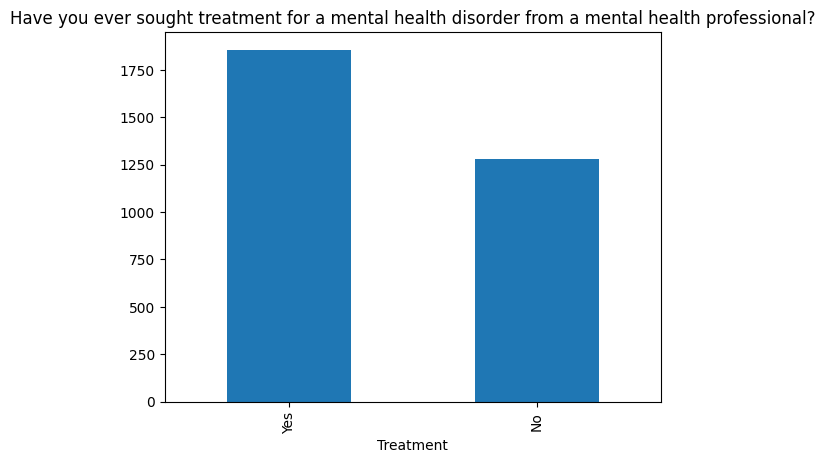

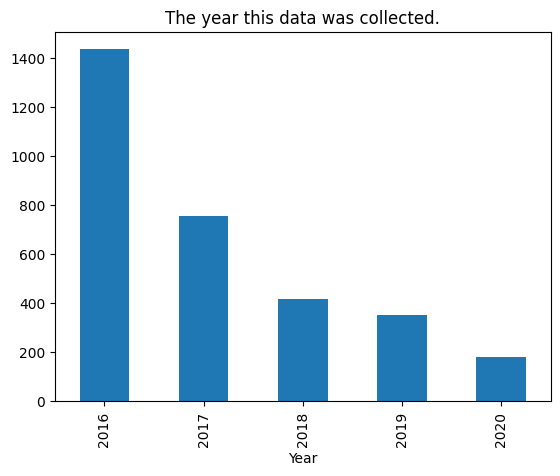

In [65]:
# Next Categorical attributes
for att in cat_attribues:
    in_df[att].value_counts().plot(kind='bar', color='C0')
    plt.title(Column_dict[att])
    plt.savefig('%s.png' % att, bbox_inches='tight')
    plt.show()

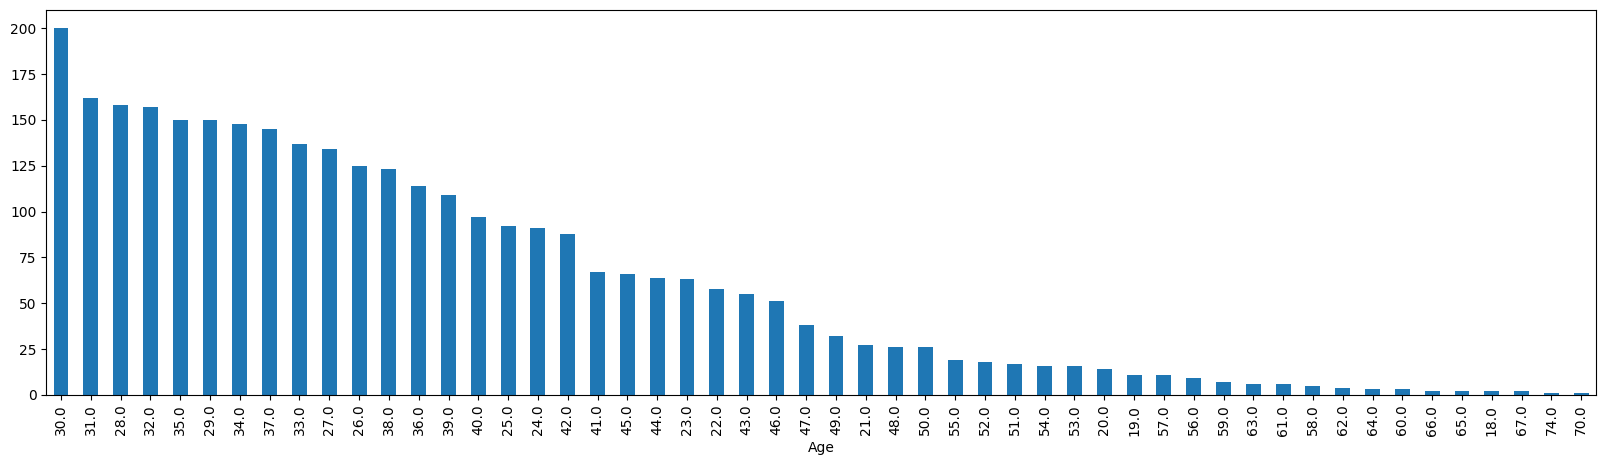

In [66]:
plt.figure(figsize=(20,5))
in_df['Age'].value_counts().plot(kind='bar', color='C0')
plt.savefig('Age.png', dpi=1000, bbox_inches='tight')

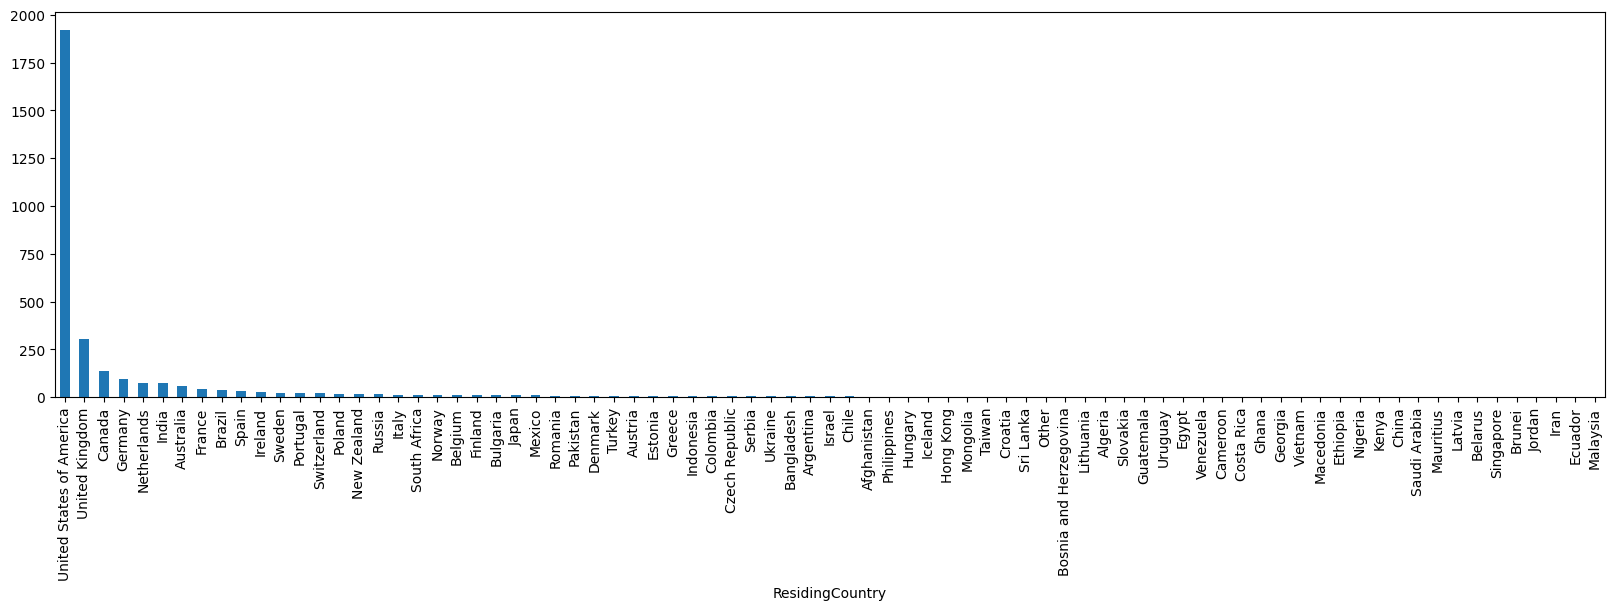

In [67]:
plt.figure(figsize=(20,5))
in_df['ResidingCountry'].value_counts().plot(kind='bar', color='C0')
plt.savefig('ResidingCountry.png', dpi=1000, bbox_inches='tight')

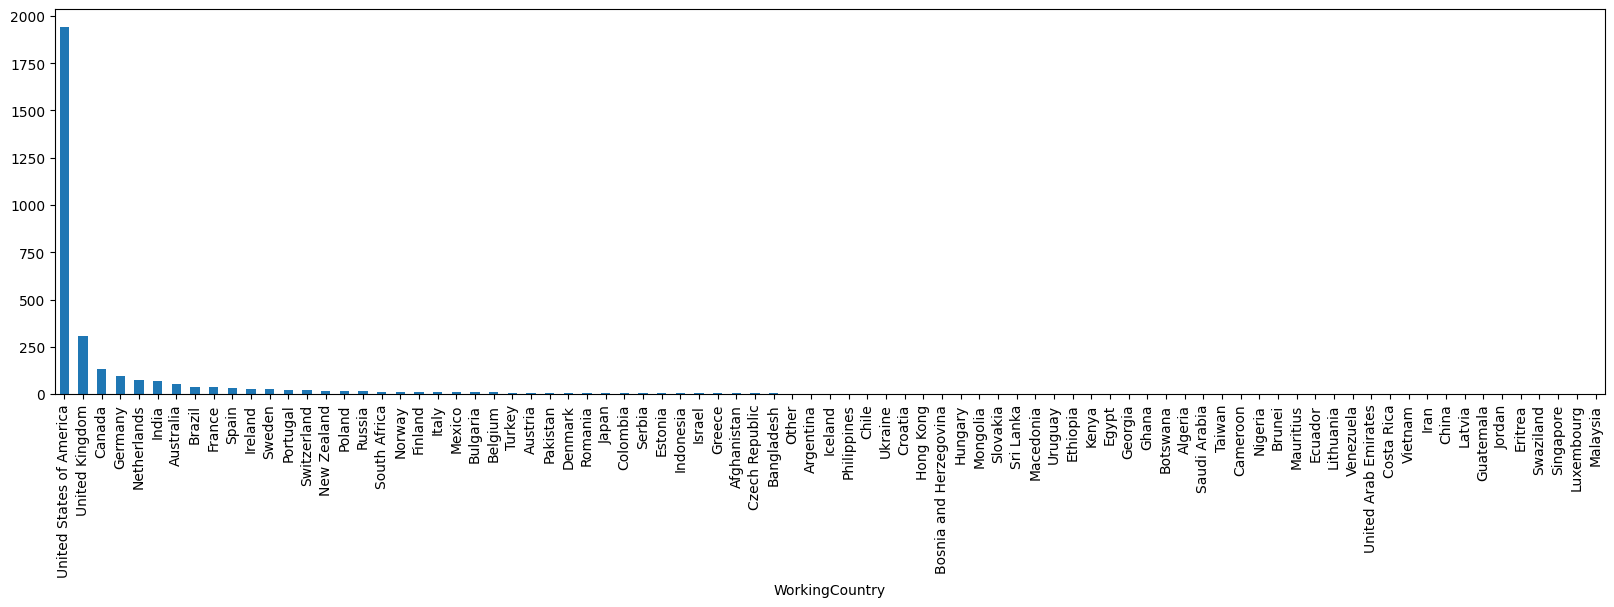

In [68]:
plt.figure(figsize=(20,5))
in_df['WorkingCountry'].value_counts().plot(kind='bar', color="C0")
plt.savefig('WorkingCountry.png', dpi=1000, bbox_inches='tight')

In analyzing the bar charts for two specific attributes, it's evident that the issue doesn't stem from erroneous data entries. Rather, the disproportionate representation of the United States in the dataset suggests a potential bias, possibly due to higher encouragement for survey participation in the US. To address this, a prudent approach is to narrow our focus to respondents from the United States, eliminating rows where both WorkingCountry and ResidingCountry are not 'United States of America'. Post this transformation, these attributes carry a singular value, providing no additional information to the dataset. Consequently, the logical step forward is to remove both attributes from the dataset.

In [69]:
BM = (in_df.WorkingCountry == 'United States of America') & (in_df.ResidingCountry == 'United States of America')
in_df = pd.DataFrame(in_df[BM])

In [70]:
in_df.WorkingCountry.value_counts()

WorkingCountry
United States of America    1913
Name: count, dtype: int64

In [71]:
in_df.ResidingCountry.value_counts()

ResidingCountry
United States of America    1913
Name: count, dtype: int64

In [72]:
in_df.drop(columns=['WorkingCountry', 'ResidingCountry'], inplace=True)

#### Detecting and dealing with Missing values

In [73]:
print('Number of missing values')
for col in in_df.columns:
    BM = in_df[col].isnull()
    wdf =in_df[BM]
    print(col)
    print(len(wdf))
    print('-------------------------')

Number of missing values
SupportQ1
228
-------------------------
SupportQ2
228
-------------------------
SupportQ3
228
-------------------------
SupportQ4
228
-------------------------
SupportQ5
228
-------------------------
AttitudeQ1
228
-------------------------
AttitudeQ2
228
-------------------------
AttitudeQ3
0
-------------------------
SupportEx1
1810
-------------------------
SupportEx2
1685
-------------------------
Age
4
-------------------------
Gender
0
-------------------------
MentalIlness
536
-------------------------
Treatment
0
-------------------------
Year
0
-------------------------


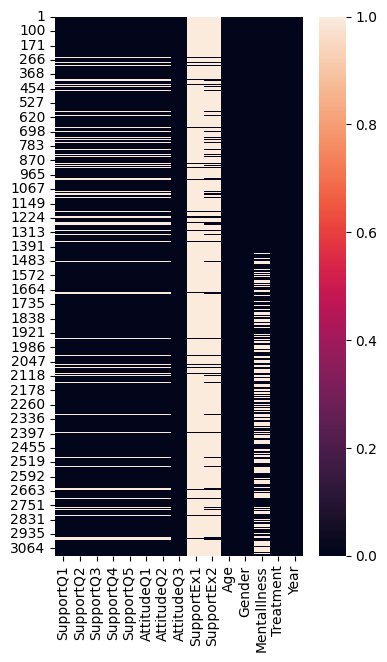

In [74]:
plt.figure(figsize=(4,7))
sns.heatmap(in_df.isna())
plt.savefig('MV_Assortment.png', dpi=1000, bbox_inches='tight')

In [75]:
in_df.drop(columns=['SupportEx1', 'SupportEx2'], inplace=True)

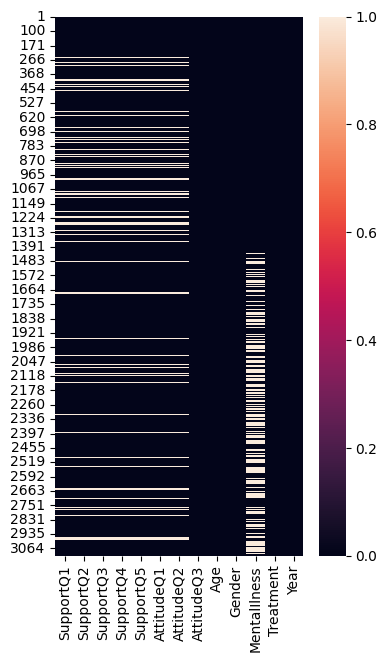

In [76]:
plt.figure(figsize=(4,7))
sns.heatmap(in_df.isna())
plt.show()

#### The common Missing values in attributes SupportQ1 to AttitudeQ3

In [77]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}
    
    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())    
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])
   
    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()
    
    plt.figure(figsize=(10,4))
    
    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()
    
    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()
    
    p_value = ttest_ind(group_1_data,group_2_data).pvalue
    
    print('p-value of t-test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for Age:


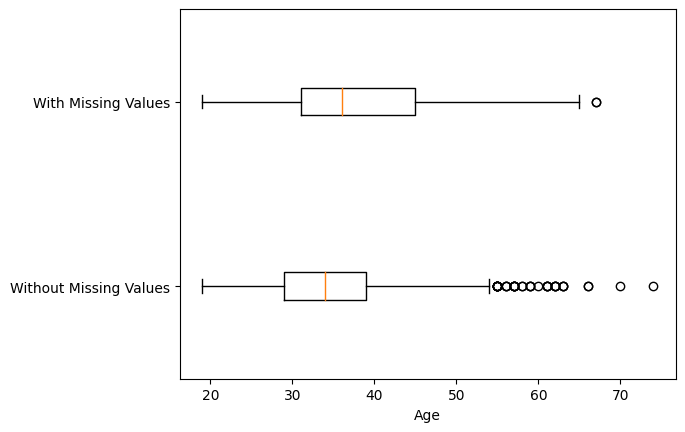

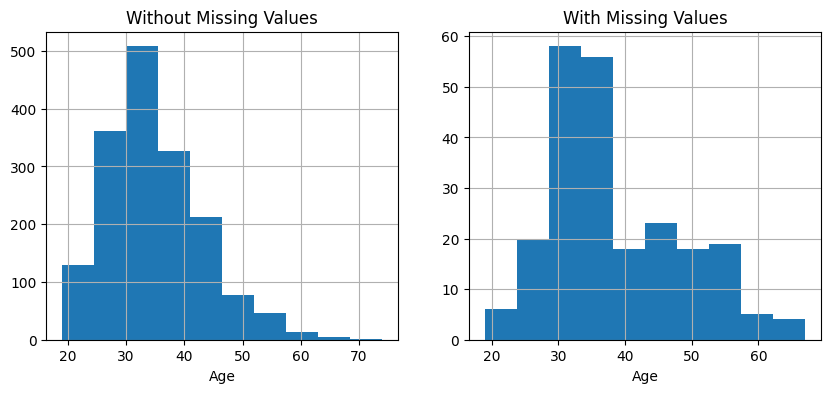

p-value of t-test: 4.807267428880384e-10
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [78]:
numerical_attributes = ['Age']

BM_MV = in_df.SupportQ1.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(in_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

In [79]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])   
    p_value = chi2_contingency(contigency_table)[1]
    
    print('p-value of Chi_squared test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for AttitudeQ3:


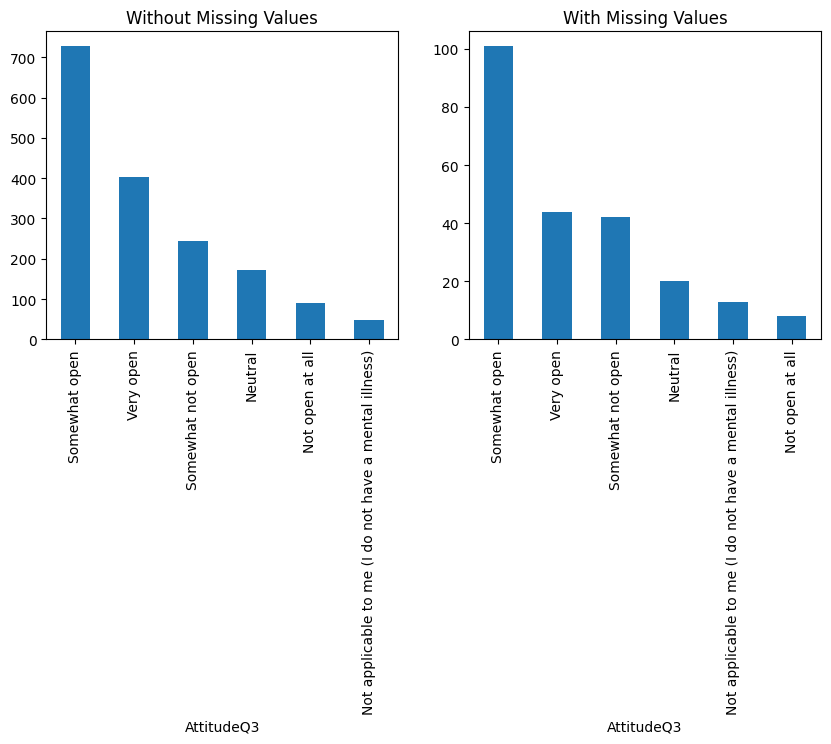

p-value of Chi_squared test: 0.04761658679854561
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Gender:


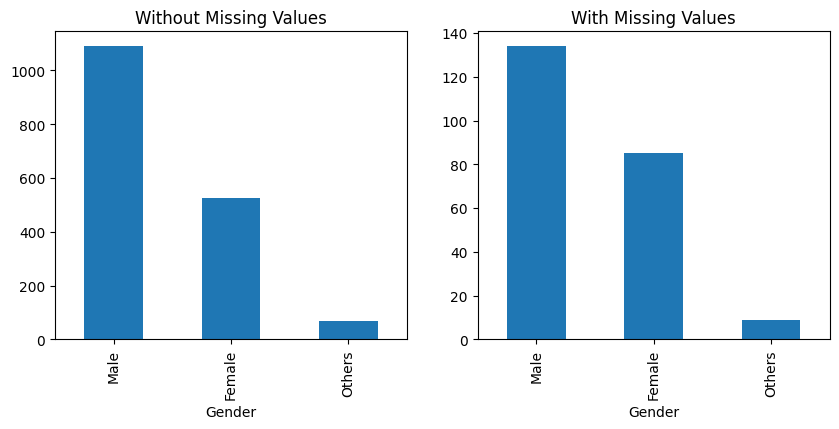

p-value of Chi_squared test: 0.1858113917370415
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for MentalIlness:


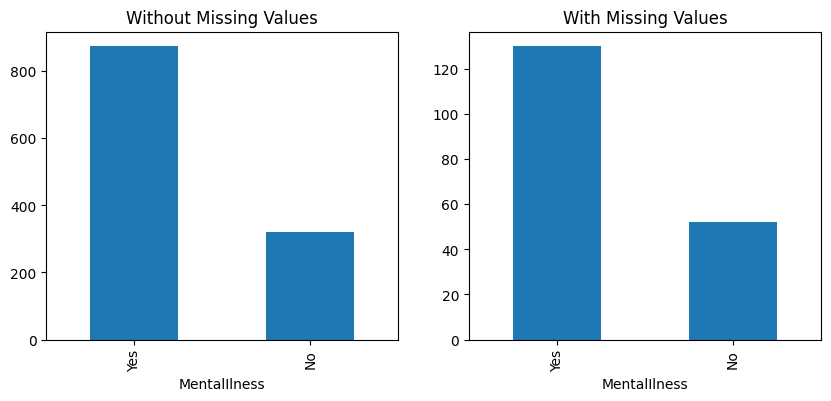

p-value of Chi_squared test: 0.693647485888784
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Treatment:


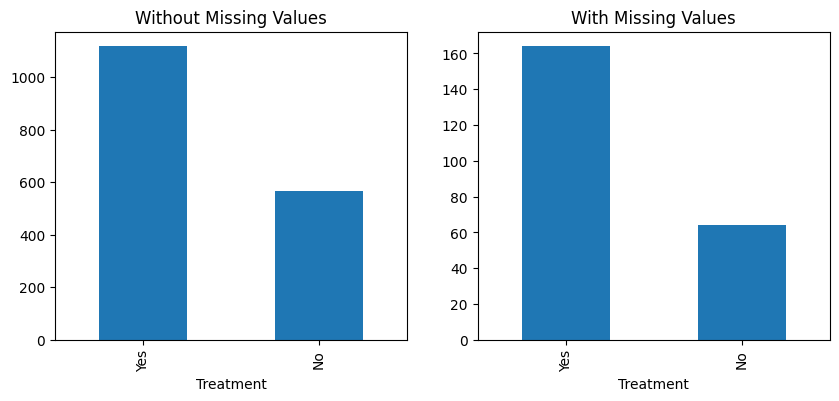

p-value of Chi_squared test: 0.10810722533716499
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Year:


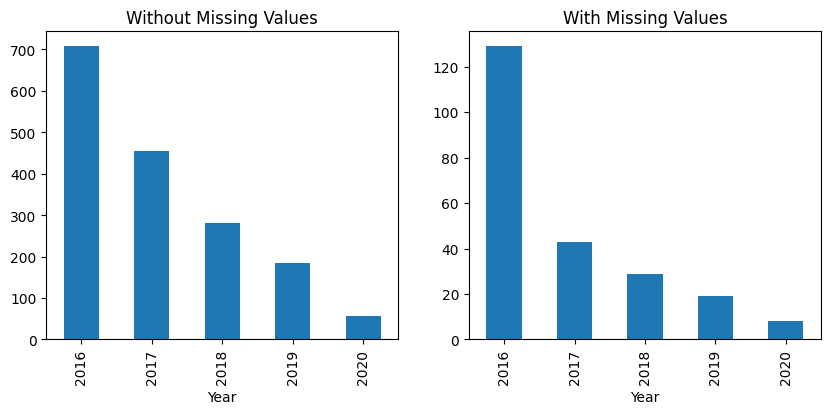

p-value of Chi_squared test: 0.0012055539174552997
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [80]:
cat_attribues = ['AttitudeQ3', 'Gender', 'MentalIlness', 'Treatment', 'Year']

BM_MV = in_df.SupportQ1.isna()
for att in cat_attribues:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(in_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

#### The Missing values in the attribute MentalIlness

In [81]:
BM_MV = in_df.MentalIlness.isna()
print(sum(BM_MV))
print(sum(BM_MV)/len(in_df))

536
0.2801881860951385


Diagnosis Analysis of Missing Values for Age:


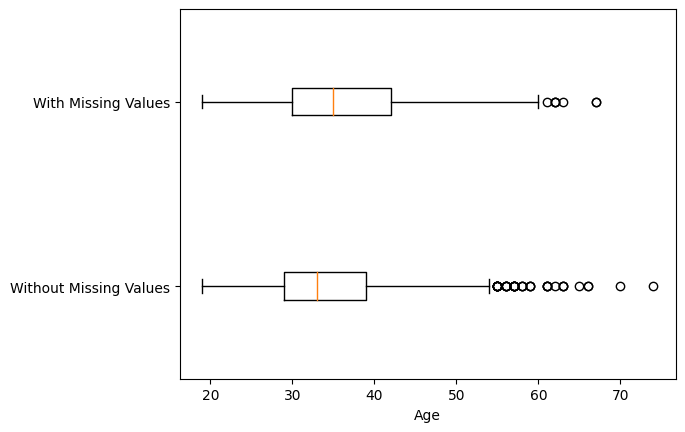

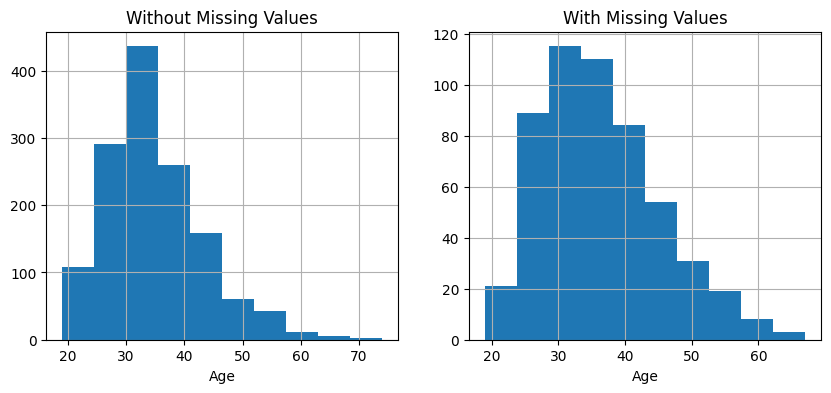

p-value of t-test: 6.924335766869287e-05
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [82]:
numerical_attributes = ['Age']

BM_MV = in_df.MentalIlness.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(in_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

Diagnosis Analysis of Missing Values for Age:


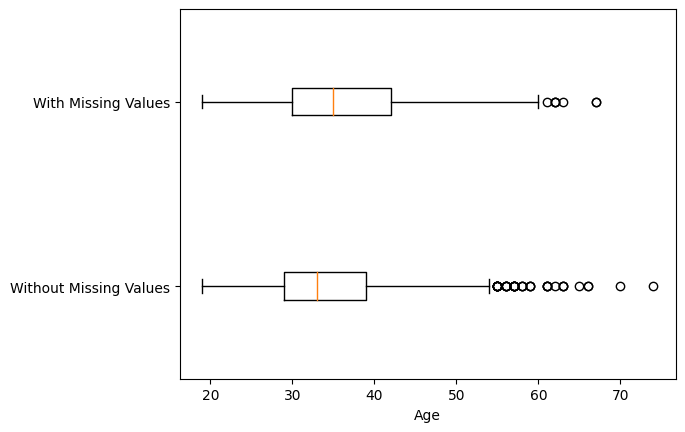

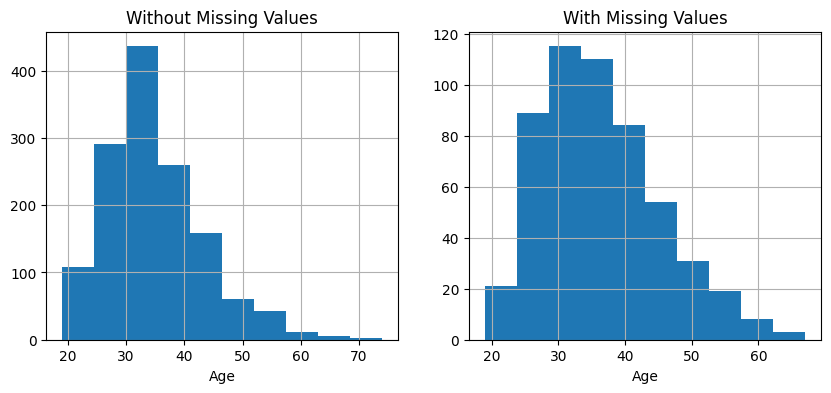

p-value of t-test: 6.924335766869287e-05
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [83]:
numerical_attributes = ['Age']

BM_MV = in_df.MentalIlness.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(in_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

# <center>Analysis
## Analysis Question 1: Is there a significant difference between the mental health of employees across the attribute of gender?

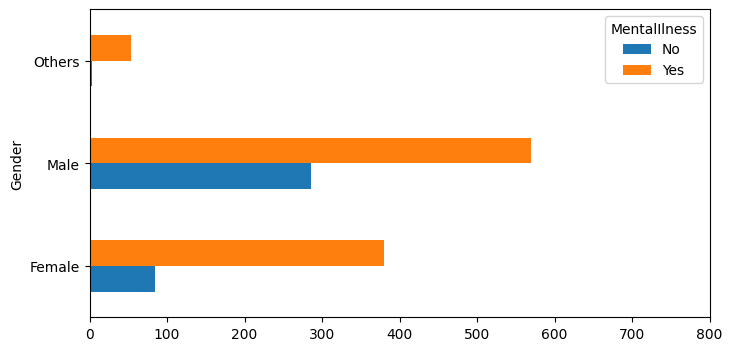

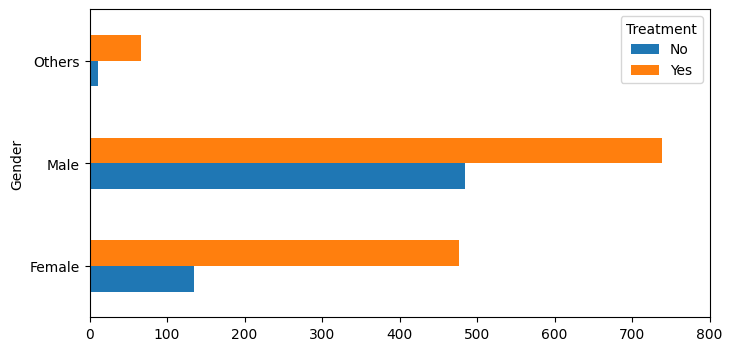

In [84]:
in_df.groupby(['Gender','MentalIlness']).size().unstack().plot.barh(xlim=[0,800],figsize=(8,4))
in_df.groupby(['Gender','Treatment']).size().unstack().plot.barh(xlim=[0,800],figsize=(8,4))
plt.show()

The preceding figure shows that the Gender attribute does have a meaningful impact on the mental
health of tech employees. So the answer to this question is yes. However, while the ratio of not
having a mental illness compared to having a mental illness is higher for Male than Female, there is
also a much higher "never having sought professional mental health help" ratio among Male. These
observations suggest that there is a population of male employees in tech that are not aware of their
mental health and have never sought professional help. Based on these observations, it should be
recommended to target male employees for mental health awareness.

Another important observation from the preceding figure is that there seem to be many more mental
health concerns for the individuals who have not chosen Male or Female for their gender. However,
the preceding figure does not show what the difference is because this segment of the population has
much smaller data objects than Male and Female. Therefore, to tease out the portion of these
individuals with mental health concerns and compare them with the other two subpopulations, the
following two heat maps were created:

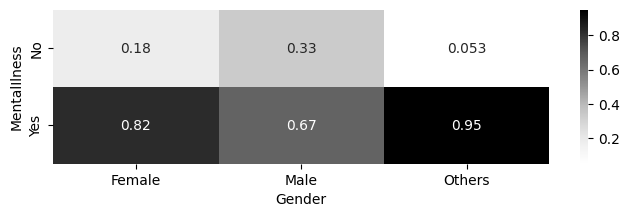

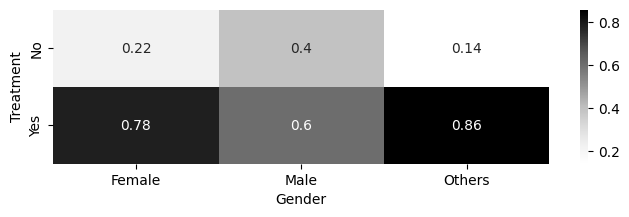

In [85]:
plt.figure(figsize=(8,2))
cont_table = pd.crosstab(in_df.MentalIlness,in_df.Gender)
probablity_tbl = cont_table/ cont_table.sum()
sns.heatmap(probablity_tbl,annot=True, center=0.5 ,cmap="Greys")
plt.show()

plt.figure(figsize=(8,2))
cont_table = pd.crosstab(in_df.Treatment,in_df.Gender)
probablity_tbl = cont_table/ cont_table.sum()
sns.heatmap(probablity_tbl,annot=True, center=0.5 ,cmap="Greys")
plt.show()

In the preceding figure, we can see that indeed the subpopulation that did not identify as Male or
Female has a much larger percentage of people with mental illnesses than the other two populations.
However, we can that see this population, similar to the population of Female, has a higher
percentage of having sought treatment.

## Analysis Question 2: Is there a significant difference between the mental health of employees across the attribute of Age?

In [86]:
BM_Age_MV =  in_df.Age.isna()
wdf = pd.DataFrame(in_df[~BM])
wdf

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,Age,Gender,MentalIlness,Treatment,Year
1,No,Yes,Yes,Yes,Somewhat easy,Yes,Maybe,Somewhat open,29.0,Male,Yes,Yes,2016
4,Yes,No,No,No,Neither easy nor difficult,No,Maybe,Somewhat open,43.0,Female,Yes,Yes,2016
6,I don't know,No,No,I don't know,Somewhat easy,Yes,Maybe,Not applicable to me (I do not have a mental i...,30.0,Male,No,No,2016
7,Yes,No,Yes,Yes,Very easy,Yes,Maybe,Somewhat open,37.0,Female,Yes,Yes,2016
8,I don't know,No,No,I don't know,Very difficult,Maybe,Yes,Somewhat open,44.0,Female,Yes,Yes,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,Yes,No,No,Yes,Difficult,Maybe,Maybe,Not open at all,34.0,Male,Yes,Yes,2020
3126,Yes,Yes,Yes,I don't know,Very easy,Yes,Yes,Very open,39.0,Male,Yes,Yes,2020
3129,Yes,Yes,Yes,Yes,Very easy,Maybe,Maybe,Somewhat open,39.0,Male,NaN,Yes,2020
3133,No,No,No,No,Somewhat difficult,No,No,Very open,53.0,Male,NaN,No,2020


In [87]:
wdf['ageGroup'] = pd.qcut(wdf.Age,3,labels=['<30','31-37','>38'])

In [88]:
wdf.ageGroup.value_counts()

ageGroup
<30      652
>38      634
31-37    623
Name: count, dtype: int64

In [89]:
BM_MV = wdf.MentalIlness.isna()
wdf.loc[wdf[BM_MV].index,'MentalIlness'] = 'MV-MAR'

In [90]:
wdf.MentalIlness.value_counts()

MentalIlness
Yes       1004
MV-MAR     536
No         373
Name: count, dtype: int64

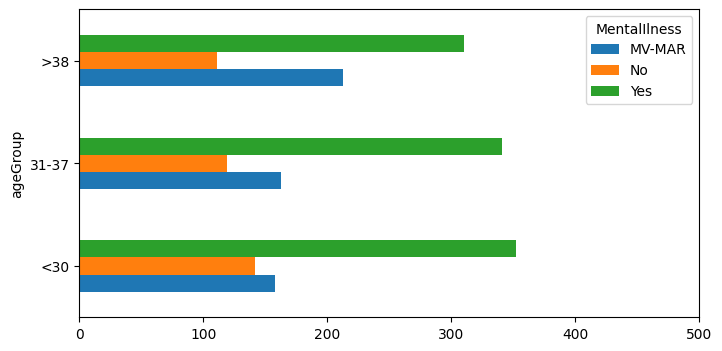

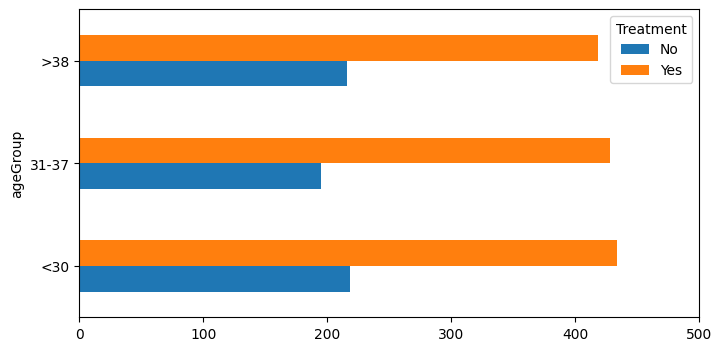

In [91]:
wdf.groupby(['ageGroup','MentalIlness']).size().unstack().plot.barh(xlim=[0,500],figsize=(8,4))
wdf.groupby(['ageGroup','Treatment']).size().unstack().plot.barh(xlim=[0,500],figsize=(8,4))
plt.show()

Studying the preceding figure, we can see that there seem to be some patterns in the data; however,
they are not as pronounced as they were under AQ1, so before discussing these patterns, let's see
whether these patterns are significant statistically.

In [92]:
from scipy.stats import chi2_contingency
contigency_table = pd.crosstab(wdf.ageGroup,wdf.MentalIlness)   
p_value = chi2_contingency(contigency_table)[1]
print('p-value of Chi_squared test: {}'.format(p_value))

p-value of Chi_squared test: 0.0022404788218729006


In [93]:
from scipy.stats import chi2_contingency
contigency_table = pd.crosstab(wdf.ageGroup,wdf.Treatment)   
p_value = chi2_contingency(contigency_table)[1]
print('p-value of Chi_squared test: {}'.format(p_value))

p-value of Chi_squared test: 0.549702095016964


After calculating the p-values of the test for both bar charts in the preceding figure, we come to
0.0022 and 0.5497 respectively. This tells us that there are no significant patterns in the second bar
chart, but the patterns in the first bar chart are significant. Using this information, we can conclude
that while age does have an impact on mental health concerns, it does not impact the behavior of
individuals in seeking treatment.

Moreover, the significant pattern in the first bar chart tells us that as the Age attribute increases, the
answer no to the question "Have you ever been diagnosed with a mental health disorder?" also
increases. Surprisingly, the answer yes to the same question also increases. It is surprising because we
would expect these two to counteract with one another. The reason for this surprising observation is
also shown in this bar chart; as the age increases, the number of individuals who have not answered
the question has also increased. This could be because older individuals do not have as much trust in
the confidentiality of the data collection.

The conclusion that is drawn from this observation is that older tech employees may need to build
more trust for them to open up about their mental health concerns than younger employees.

## Analysis Question 3: Do more supportive companies lead to having healthier employees mentally?

In [94]:
def CalculateSupportScore(row):
    s = 0
    if(row.SupportQ1 == 'Yes'):
        s = s +1
    if(row.SupportQ1 == 'No'):
        s = s -1
    if(row.SupportQ1 == 'Not eligible'):
        s = s -0.5
        
    if(row.SupportQ2 == 'Yes'):
        s = s +1
    if(row.SupportQ2 == 'No'):
        s = s -1
    
    if(row.SupportQ3 == 'Yes'):
        s = s +1
    if(row.SupportQ3 == 'No'):
        s = s -1
        
    if(row.SupportQ4 == 'Yes'):
        s = s +1
    if(row.SupportQ4 == 'No'):
        s = s -1
        
    if(row.SupportQ5 == 'Very easy'):
        s = s +1
    if(row.SupportQ5 == 'Somewhat easy'):
        s = s +0.5
    if(row.SupportQ5 == 'Somewhat difficult'):
        s = s - 0.5
    if(row.SupportQ5 == 'Somewhat difficult'):
        s = s - 0.75
    if(row.SupportQ5 == 'Very difficult'):
        s = s -1
    return s

In [95]:
in_df['PerceivedSupportScore'] = in_df.apply(CalculateSupportScore, axis = 1)

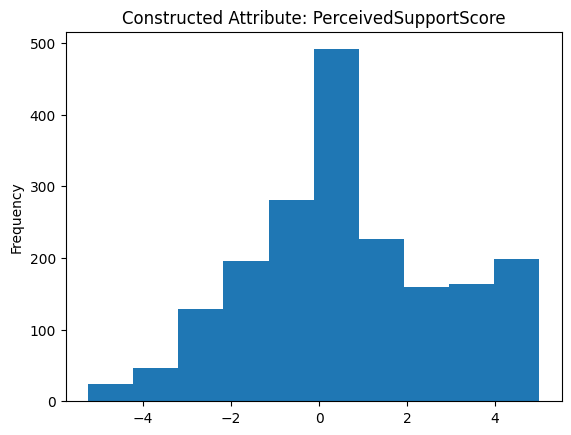

In [96]:
in_df.PerceivedSupportScore.plot(kind='hist')
plt.title('Constructed Attribute: PerceivedSupportScore')
plt.show()

In [97]:
def SupporiveOrNot(v):
    if(v>1):
        return('Supportive')
    elif(v<-0.5):
        return('Unsupprotive')
    else:
        return('Neutral')

In [98]:
in_df['perceivedSupportGroup'] = in_df.PerceivedSupportScore.apply(SupporiveOrNot)

In [99]:
in_df.perceivedSupportGroup.value_counts()

perceivedSupportGroup
Neutral         764
Supportive      593
Unsupprotive    556
Name: count, dtype: int64

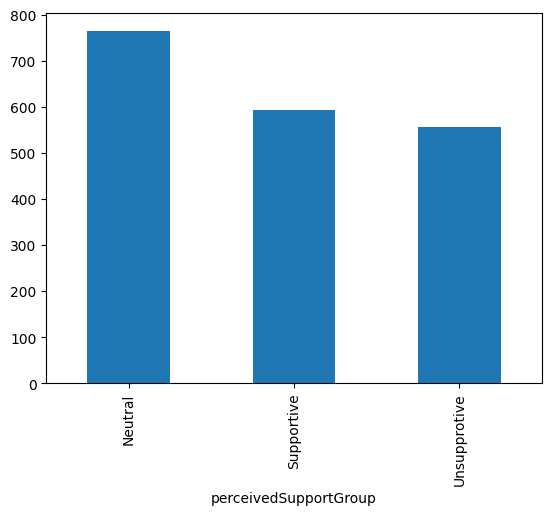

In [100]:
in_df.groupby('perceivedSupportGroup').size().plot(kind='bar')
plt.show()

In [101]:
BM = in_df.perceivedSupportGroup == 'Neutral'
wdf = pd.DataFrame(in_df[~BM])

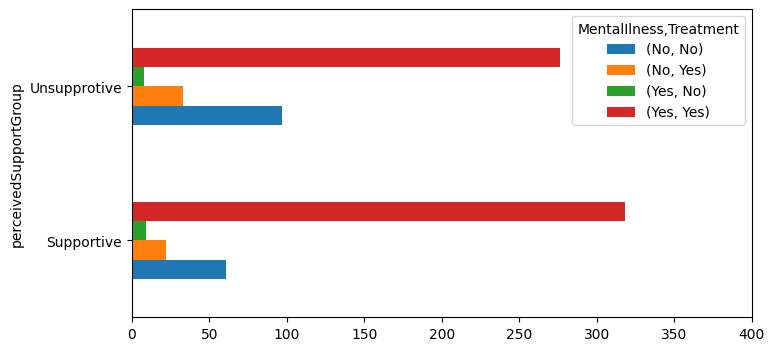

In [102]:
wdf.groupby(['perceivedSupportGroup','Treatment','MentalIlness']).size().unstack().unstack().plot.barh(xlim=[0,400],figsize=(8,4))
plt.show()

Studying the patterns shown in the preceding figure, we realize that perceivedSupportScore
influences the employee's behavior in seeking professional help for mental health concerns. The
number of respondents that have answered Yes to both "Have you ever been diagnosed with a mental
health disorder?" and "Have you ever sought treatment for a mental health disorder from a mental
health professional?" questions is significantly higher in the Supportive category. Likewise, the
number of respondents that have answered No to both questions is significantly lower in the
Supportive category.

Based on these observations, we can recommend investing in creating trust and employees'
perception of support in tech companies.


## Analysis Question 4: Does the attitude of individuals toward mental health influence their mental health and their seeking of treatments?

In [103]:
def CalculateAttitudeScore(row):
    s = 0
    if(row.AttitudeQ1 == 'Very open'):
        s = s +1
    if(row.AttitudeQ1 == 'No'):
        s = s -1
        
    if(row.AttitudeQ1 == 'Yes'):
        s = s +1
    if(row.AttitudeQ1 == 'No'):
        s = s -1
    
    if(row.AttitudeQ3 == 'Yes'):
        s = s +1
    if(row.AttitudeQ3 == 'Somewhat open'):
        s = s +0.5
    if(row.AttitudeQ3 == 'Somewhat not open'):
        s = s -0.5
    if(row.AttitudeQ3 == 'Not open at all'):
        s = s -1

    return s

In [104]:
in_df['AttitudeScore'] = in_df.apply(CalculateAttitudeScore, axis = 1)

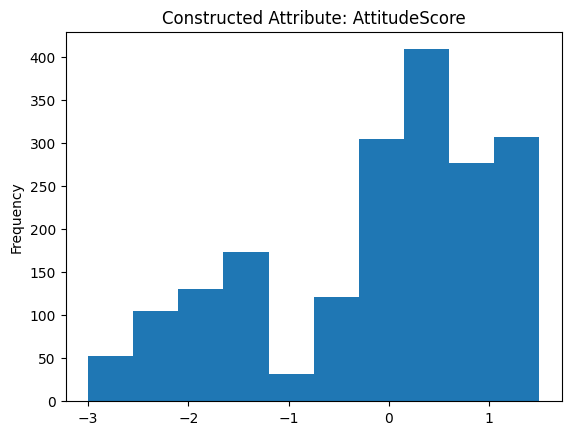

In [105]:
in_df.AttitudeScore.plot(kind='hist')
plt.title('Constructed Attribute: AttitudeScore')
plt.show()

In [106]:
in_df['RandomNumber'] = np.random.random(len(in_df))
in_df['AttitudeScore_r'] = in_df.AttitudeScore.apply(lambda v: v+np.random.random()-0.75)

In [107]:
def OpenorClose(v):
    if(v>.5):
        return('OpenAttitude')
    elif(v>-0.5):
        return('Neutral')
    else:
        return('ClosedAttitude')

In [108]:
in_df['attitudeGroup'] = in_df.AttitudeScore.apply(OpenorClose)

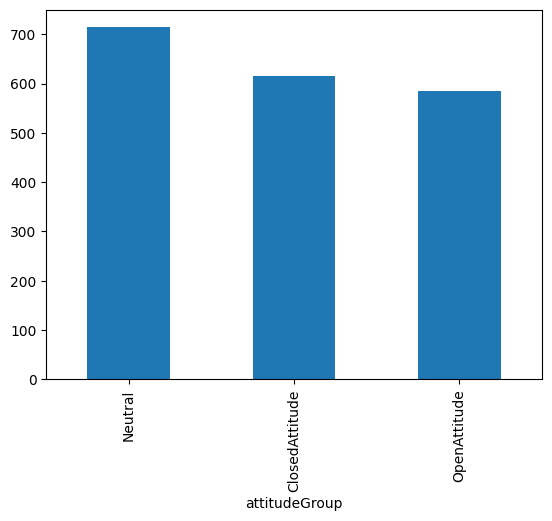

In [109]:
in_df.attitudeGroup.value_counts().plot(kind='bar')
plt.show()

In [110]:
BM = in_df.attitudeGroup == 'Neutral'
wdf = pd.DataFrame(in_df[~BM])

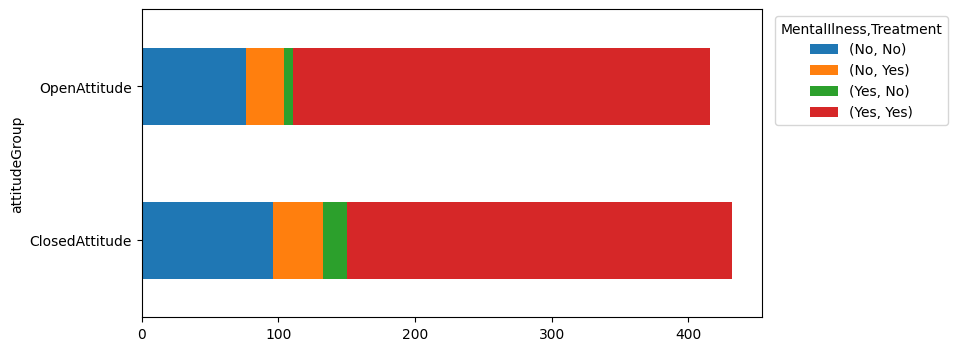

In [111]:
wdf.groupby(['attitudeGroup','Treatment','MentalIlness']).size().unstack().unstack().plot.barh(figsize=(8,4),stacked=True)
plt.legend(title = 'MentalIlness,Treatment', bbox_to_anchor=(1.01, 1))
plt.show()

There seems to be a meaningful improvement in employees seeking treatment if they have an open attitude toward sharing mental
health issues. These observations suggest that tech companies should see the education of employees
in their attitude toward mental health as a sensible investment option.
